### About the Data:
The dataset consists of all the basic bank details of the customers, and the dataset has categorical and numerical variables. It has missing values and more anomalies. It consists of the customer’s bank and processional details over the years so we can explore more of it.  We have given the two data sets namely Train and Test datasets. We will use the Train dataset to build and test the model. Then we can use the Test dataset to submit our results.

### Problem Statement:
We are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce manual efforts.

### Objective: 
The objective of this project is to explore the data to identify the pattern that causes the person to have a good or bad or standard type credit score and build a machine learning model that should be able to predict or classify the credit score type.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = 50

# display all rows of the dataframe
pd.options.display.max_rows = 10

# import various functions from sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

# import the XGBoost function for classification
from xgboost import XGBClassifier

In [2]:
from sklearn.multiclass import OneVsRestClassifier

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [10,5]

In [4]:
# loading the dataset and store it in a dataframe

cred_train_df = pd.read_csv('train.csv')
cred_train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
cred_train_df.shape

(100000, 28)

In [6]:
cred_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
cred_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [8]:
cred_train_df.describe(include = 'object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
...,...,...,...,...
Payment_of_Min_Amount,100000,3,Yes,52326
Amount_invested_monthly,95521,91049,__10000__,4305
Payment_Behaviour,100000,7,Low_spent_Small_value_payments,25513
Monthly_Balance,98800,98792,__-333333333333333333333333333__,9


In [9]:
# copying the original train dataframe into 2 dfs

df1 = cred_train_df.copy()

### Test Data

In [10]:
cred_test_df = pd.read_csv('test.csv')
cred_test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [11]:
cred_test_df.shape

(50000, 27)

In [12]:
# copying the test dataframe
df2 = cred_test_df.copy()

In [13]:
# Add keys before concatenation
df1['set'] = 'train'
df2['set'] = 'test'

# merging the two dataframes (train and test)
train_test_combined_df = pd.concat([df1,df2], ignore_index=True)

In [14]:
train_test_combined_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,set
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,train
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,train
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,train
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,train
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,train


In [15]:
train_test_combined_df.shape

(150000, 29)

In [16]:
train_test_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [17]:
# creating a copy of combined dataframe

combined_df = train_test_combined_df.copy()

In [18]:
## ------------ Missing Value Analysis ----------------- ##

# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = combined_df.isnull().sum().sort_values(ascending=False)

# isnull().sum(): calculate the null values in each column for dataset
# isnull().count(): calculate the count values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
percent = (combined_df.isnull().sum()/combined_df.isnull().count()).sort_values(ascending=False)

# concat(): append dataframes
# axis=1: append by column
# keys: specify column name
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display dataframe of missing values
missing_data[missing_data['Total'] > 0]

,Total,Percent
Credit_Score,50000,0.333333
Monthly_Inhand_Salary,22500,0.150000
Type_of_Loan,17112,0.114080
Name,15000,0.100000
Credit_History_Age,13500,0.090000
Num_of_Delayed_Payment,10500,0.070000
Amount_invested_monthly,6750,0.045000
Num_Credit_Inquiries,3000,0.020000
Monthly_Balance,1762,0.011747


### Data Cleaning (Column-wise)

In [19]:
# Converting the columns datatypes

numeric_cols = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment',
                'Changed_Credit_Limit','Amount_invested_monthly',
                'Monthly_Balance','Outstanding_Debt']

for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors = 'coerce')

In [20]:
# rechecking datatypes

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       142584 non-null  float64
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             139500 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               142779 non-null  float64
 13  Type_of_Loan              132888 non-null  o

In [21]:
# summary stats for numerical variables
combined_df.select_dtypes(include = np.number).describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,142584.000000,1.395000e+05,127500.000000,150000.000000,150000.000000,150000.000000,142779.000000,150000.000000,135329.000000,146850.000000,147000.000000,148500.000000,150000.000000,150000.000000,136770.000000,148223.000000
mean,110.663363,1.740935e+05,4190.115139,17.006940,22.623447,71.234907,2.942723,21.063400,30.937020,10.384299,28.529014,1426.165268,32.283309,1432.513579,195.305028,402.723009
std,687.043231,1.410068e+06,3180.489657,117.069476,129.143006,461.537193,64.083711,14.860154,224.723576,6.786522,194.456058,1155.130918,5.113315,8403.759977,198.599612,213.844776
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,1.943560e+04,1625.265833,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.330000,3.000000,566.022500,28.054731,30.947775,72.232194,270.241882
50%,33.000000,3.755178e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.080000,32.297058,71.280006,128.984784,336.815865
75%,42.000000,7.281702e+04,5948.454596,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.840000,9.000000,1946.810000,36.487954,166.279555,236.844304,470.477895
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,82398.000000,1977.326102,1606.518192


#### Month

In [22]:
combined_df.Month.value_counts()

Month
January      12500
February     12500
March        12500
April        12500
May          12500
             ...  
August       12500
September    12500
October      12500
November     12500
December     12500
Name: count, Length: 12, dtype: int64

In [23]:
combined_df.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [24]:
month_dict = {'January' : 1,'February':2, 'March':3, 'April': 4, 
             'May':5, 'June':6, 'July':7, 'August':8, 'September':9,
             'October':10, 'November':11, 'December':12}

combined_df['Month'] = combined_df['Month'].map(month_dict)

#### Age

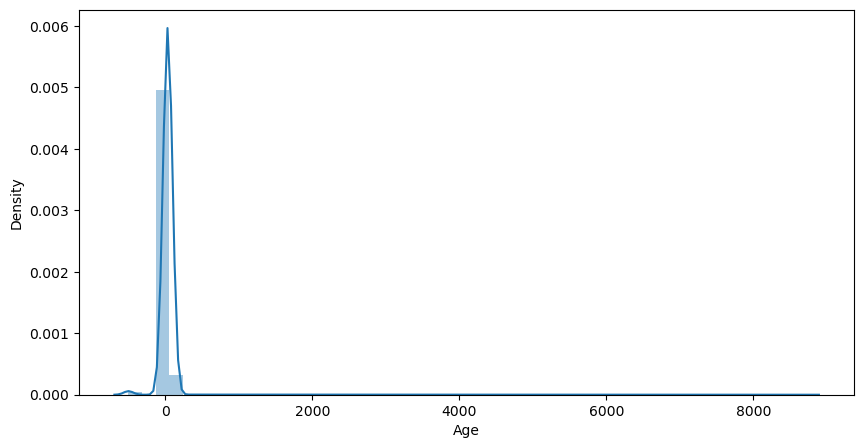

In [25]:
sns.distplot(combined_df['Age'], kde = True, hist = True)
plt.show()

In [26]:
combined_df.Age.value_counts()

Age
39.0      4198
32.0      4189
28.0      4173
26.0      4140
35.0      4130
          ... 
4655.0       1
529.0        1
8386.0       1
5924.0       1
5826.0       1
Name: count, Length: 2355, dtype: int64

In [27]:
combined_df[combined_df.Age < 0].shape[0]

1350

In [28]:
combined_df.Age.isnull().sum()

7416

In [29]:
combined_df[combined_df.Age > 100].shape[0]

2700

In [30]:
combined_df['Age'] = combined_df['Age'].apply(lambda x: x if 0 <= x <= 100 else np.nan)
combined_df['Age'] = combined_df.groupby('Customer_ID')['Age'].transform(lambda x : x.fillna(x.median()))

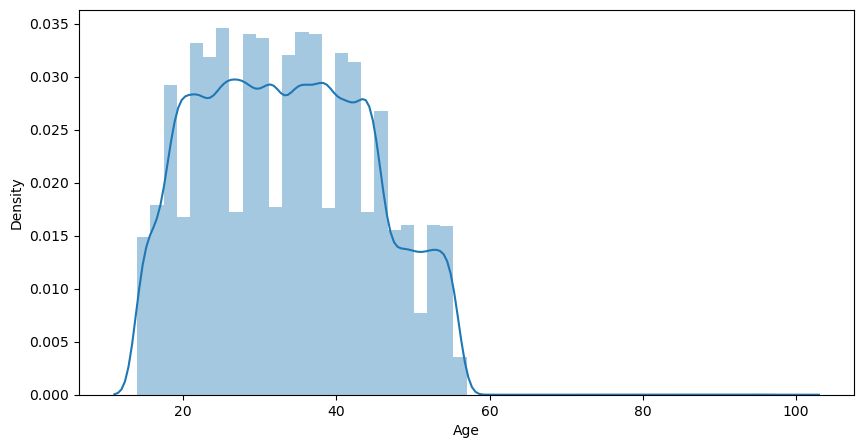

In [31]:
sns.distplot(combined_df['Age'], kde = True, hist = True)
plt.show()

#### Monthly Inhand salary

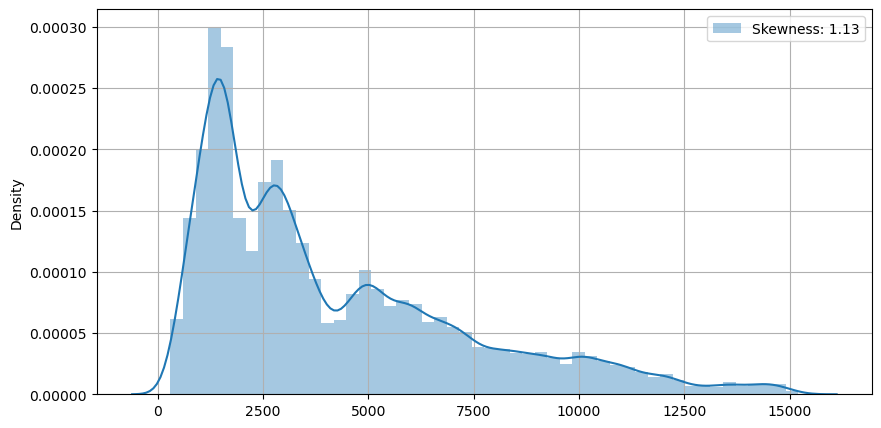

In [32]:
sns.distplot(x = combined_df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(combined_df['Monthly_Inhand_Salary'].skew()), hist= True)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [33]:
# since skewness is present we are imputing the missing values with median

combined_df['Monthly_Inhand_Salary'] = combined_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x : x.fillna(x.median()))

In [34]:
combined_df['Monthly_Inhand_Salary'].isnull().sum()

0

#### Number of Loan

In [35]:
combined_df['Num_of_Loan'].value_counts()

Num_of_Loan
3.0       21500
2.0       21423
4.0       20998
0.0       15543
1.0       15112
          ...  
1085.0        1
742.0         1
291.0         1
365.0         1
1442.0        1
Name: count, Length: 580, dtype: int64

In [36]:
combined_df['Num_of_Loan'].isnull().sum()

7221

In [37]:
combined_df[combined_df['Num_of_Loan'] < 0].shape[0]

5850

In [38]:
combined_df['Num_of_Loan'].max()

1496.0

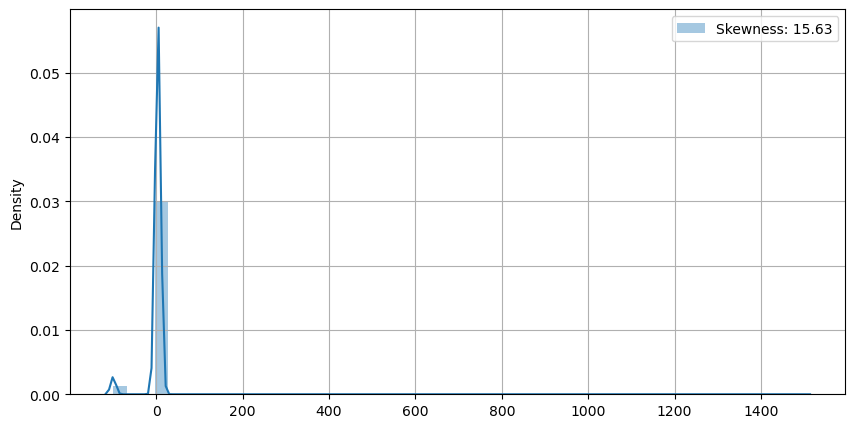

In [39]:
sns.distplot(x = combined_df['Num_of_Loan'], label = 'Skewness: %.2f'%(combined_df['Num_of_Loan'].skew()), hist= True)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [40]:
# customer-wise median imputation

combined_df['Num_of_Loan'] = combined_df['Num_of_Loan'].apply(lambda x: x if 0 <= x <= 1500 else np.nan)
combined_df['Num_of_Loan'] = combined_df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x : x.fillna(x.median()))

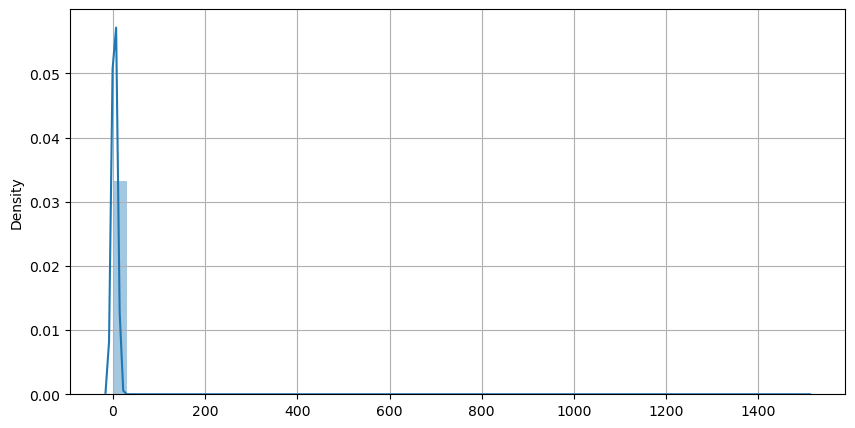

In [41]:
sns.distplot(x = combined_df['Num_of_Loan'], hist= True, kde = True)
plt.grid()
plt.show()

#### Type of Loan

In [42]:
combined_df['Type_of_Loan'].isnull().sum()

17112

In [43]:
combined_df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [44]:
combined_df['Type_of_Loan'].value_counts().sort_values(ascending = False)

Type_of_Loan
Not Specified                                                                                                                  2112
Credit-Builder Loan                                                                                                            1920
Personal Loan                                                                                                                  1908
Debt Consolidation Loan                                                                                                        1896
Student Loan                                                                                                                   1860
                                                                                                                               ... 
Home Equity Loan, Debt Consolidation Loan, Home Equity Loan, and Auto Loan                                                       12
Personal Loan, Home Equity Loan, Payday Loan, Personal Loan, Pe

In [45]:
combined_df['Type_of_Loan'].fillna('Unknown', inplace=True)

In [46]:
combined_df['Type_of_Loan'].value_counts()

Type_of_Loan
Unknown                                                                                                                               17112
Not Specified                                                                                                                          2112
Credit-Builder Loan                                                                                                                    1920
Personal Loan                                                                                                                          1908
Debt Consolidation Loan                                                                                                                1896
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 12
Payday 

#### Occupation

In [47]:
combined_df['Occupation'].value_counts()

Occupation
_______       10500
Lawyer         9899
Engineer       9562
Architect      9550
Mechanic       9459
              ...  
Journalist     9122
Doctor         9114
Manager        8973
Musician       8858
Writer         8818
Name: count, Length: 16, dtype: int64

In [48]:
def fill_occupation_by_custid(df):
    # Replace '_______' values in 'Occupation' column with NaN (empty) values
    df['Occupation'] = df['Occupation'].replace('_______', np.nan)

# call the function
fill_occupation_by_custid(combined_df)

In [49]:
combined_df['Occupation'].isnull().sum()

10500

In [50]:
# Find the most recurring 'Occupation' values for each customer
    
combined_df['Occupation'] = combined_df['Occupation'].fillna(combined_df.groupby('Customer_ID')['Occupation'].transform(lambda x : x.mode().iloc[0]))

In [51]:
combined_df['Occupation'].isnull().sum()

0

In [52]:
occupation_count = combined_df['Occupation'].value_counts()
occupation_count

Occupation
Lawyer        10644
Engineer      10296
Architect     10236
Mechanic      10164
Scientist     10116
              ...  
Doctor         9852
Journalist     9804
Manager        9648
Musician       9528
Writer         9456
Name: count, Length: 15, dtype: int64

Text(0.5, 0, 'Occupation')

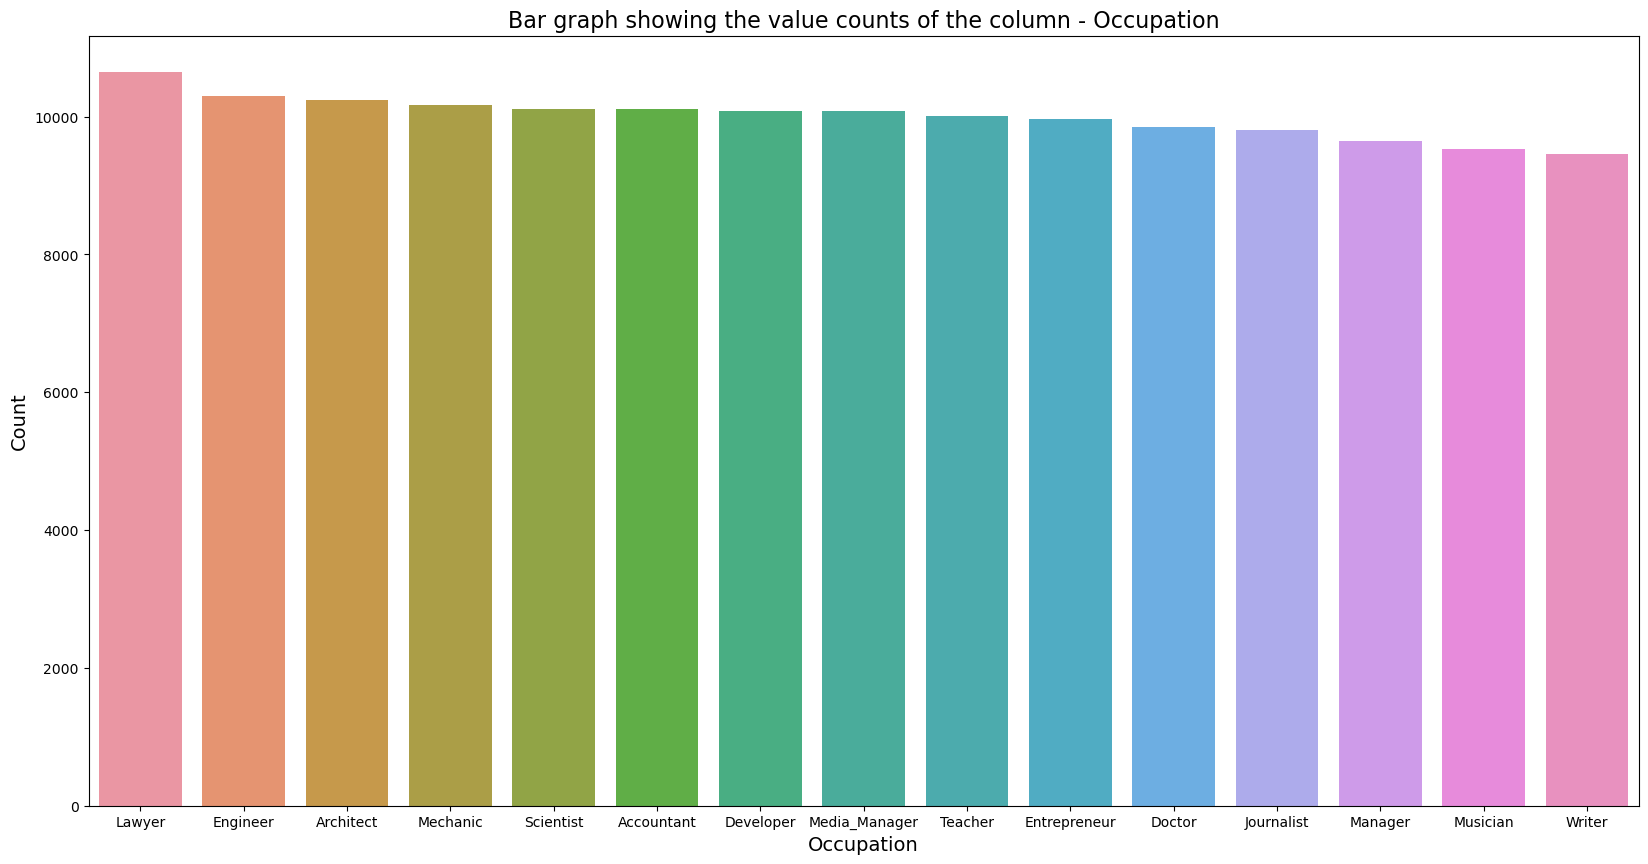

In [53]:
plt.figure(figsize = (20,10))
sns.barplot(x= occupation_count.index, y= occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize = 16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)

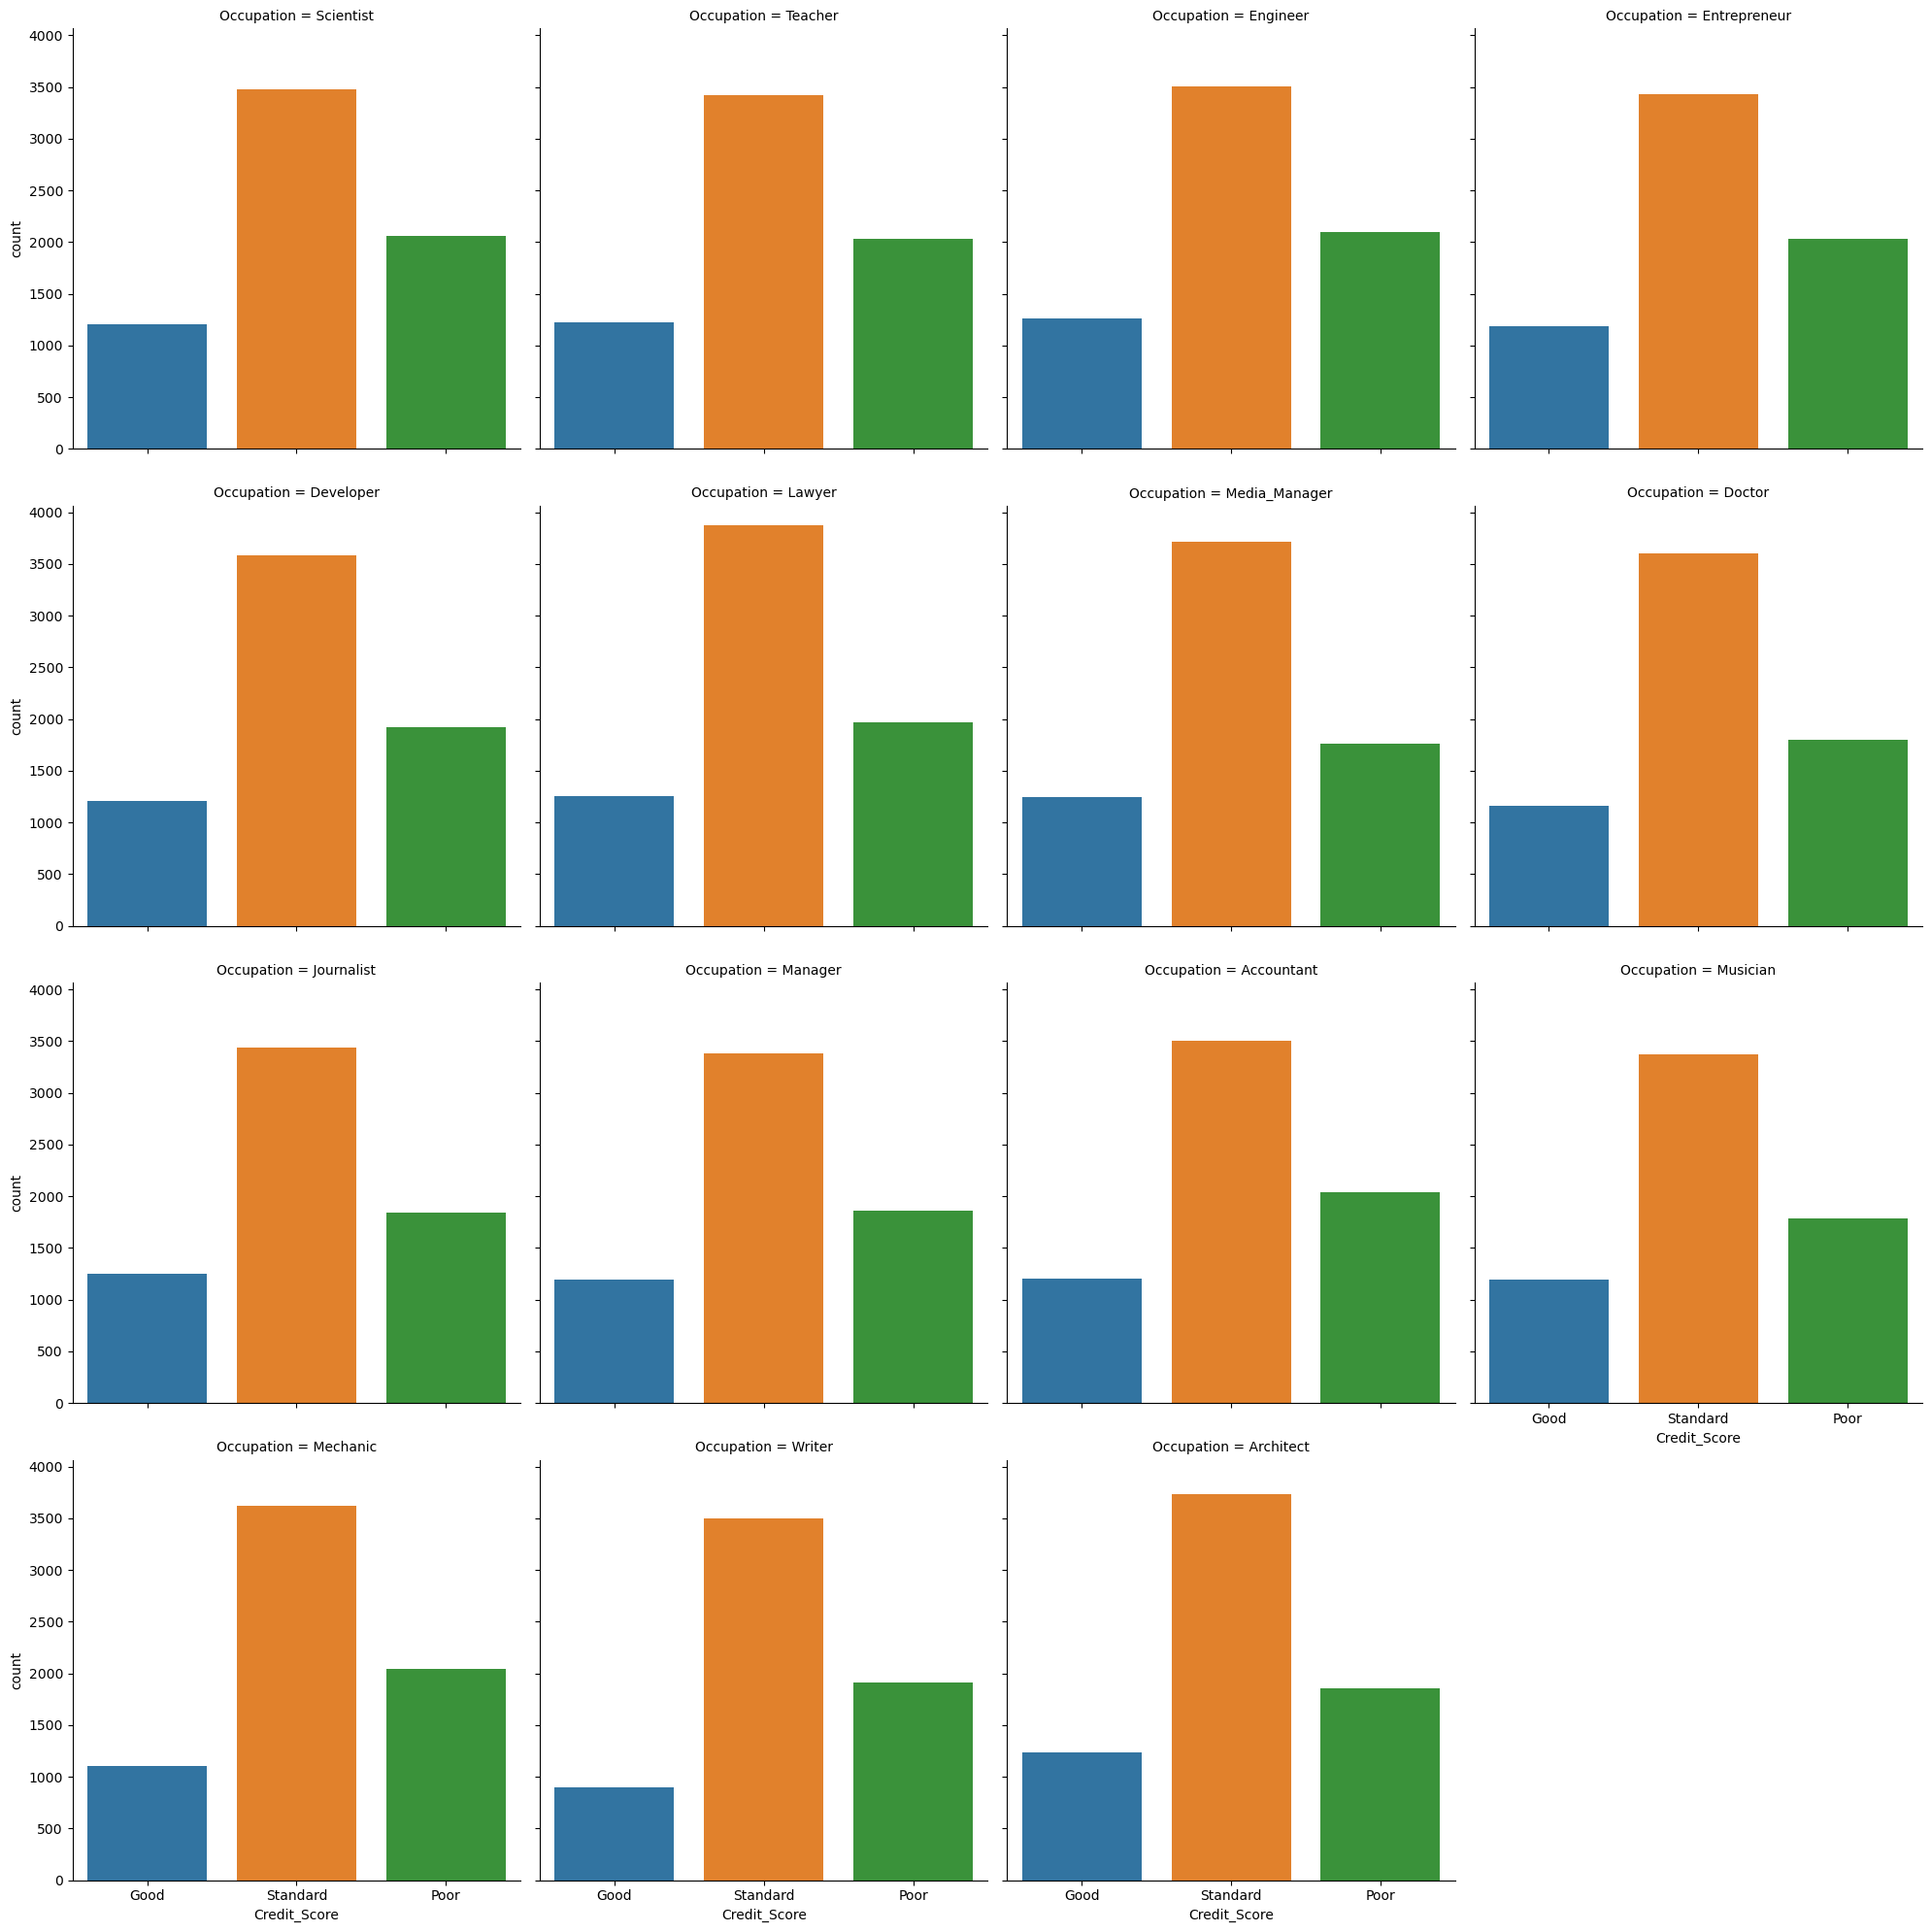

In [54]:
sns.catplot(x='Credit_Score', col='Occupation', data= combined_df, kind='count', col_wrap=4)

#### SSN

In [55]:
combined_df['SSN'].value_counts()

SSN
#F%$D@*&8      8400
078-73-5990      12
047-16-1543      12
255-39-8777      12
159-51-7992      12
               ... 
414-76-9835       7
695-71-7676       7
803-44-6289       7
074-52-8105       7
642-73-7670       6
Name: count, Length: 12501, dtype: int64

In [56]:
def fill_ssn_by_custid(df):
    # Replace '_______' values in 'Occupation' column with NaN (empty) values
    df['SSN'] = df['SSN'].replace('#F%$D@*&8', np.nan)

# call the function
fill_ssn_by_custid(combined_df)

In [57]:
combined_df['SSN'].isnull().sum()

8400

In [58]:
# Find the most recurring 'SSN' values for each customer
    
combined_df['SSN'] = combined_df['SSN'].fillna(combined_df.groupby('Customer_ID')['SSN'].transform(lambda x : x.mode().iloc[0]))

In [59]:
combined_df['SSN'].isnull().sum()

0

#### Payment Behavior

In [60]:
combined_df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: count, dtype: int64

In [61]:
def fill_paybehave_by_mode(df):
    # Replace '_______' values in 'Occupation' column with NaN (empty) values
    df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

# call the function
fill_paybehave_by_mode(combined_df)

In [62]:
# Find the most recurring 'Occupation' values for each customer
    
combined_df['Payment_Behaviour'] = combined_df['Payment_Behaviour'].fillna(combined_df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x : x.mode().iloc[0]))

In [63]:
combined_df['Payment_Behaviour'].isnull().sum()

0

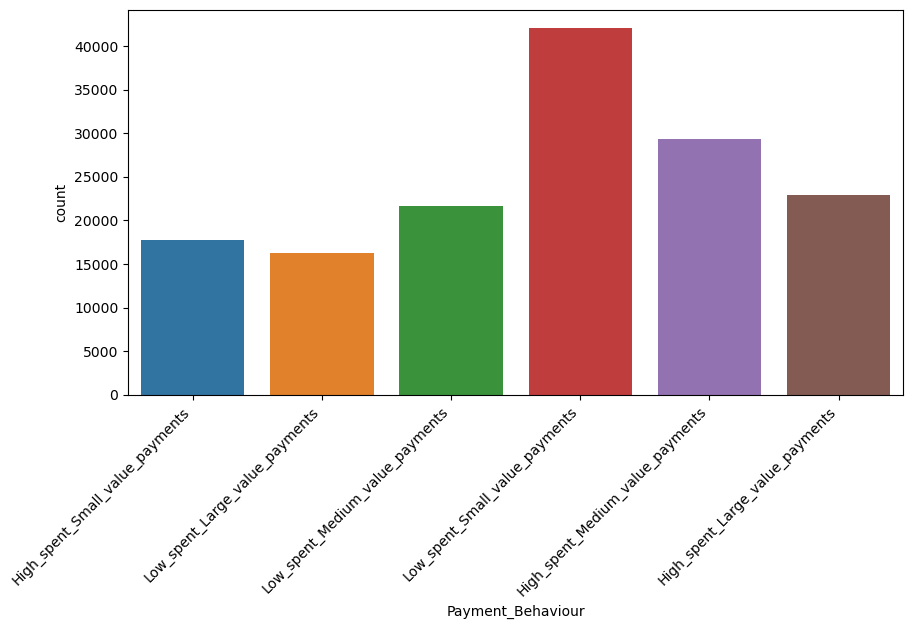

In [64]:
plot = sns.countplot(x='Payment_Behaviour', data= combined_df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  

plt.show()

#### Amount Invested Monthly

In [65]:
combined_df['Amount_invested_monthly'].value_counts().sort_values(ascending = False)

Amount_invested_monthly
0.000000      275
232.860384      1
199.458074      1
41.420153       1
62.430172       1
             ... 
28.514703       1
179.749146      1
72.248699       1
159.615404      1
220.457878      1
Name: count, Length: 136496, dtype: int64

In [66]:
combined_df['Amount_invested_monthly'].isnull().sum()

13230

In [67]:
# customer-wise median imputation

combined_df['Amount_invested_monthly'] = combined_df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.median()))

In [68]:
combined_df['Amount_invested_monthly'].isnull().sum()

0

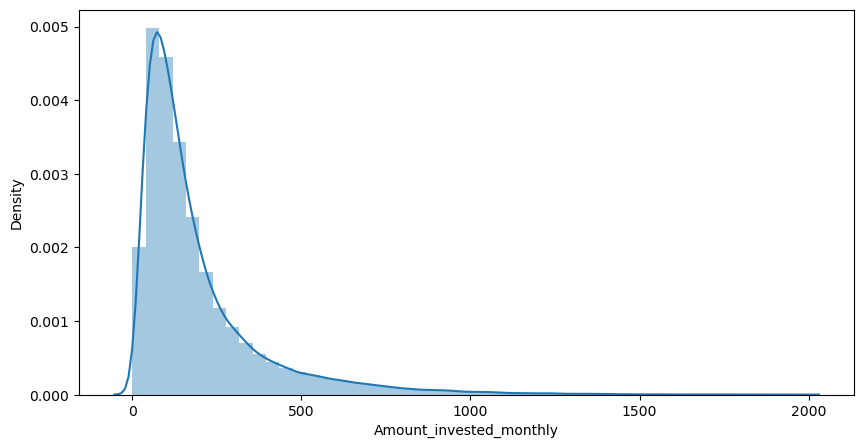

In [69]:
sns.distplot(combined_df['Amount_invested_monthly'], kde = True, hist = True)
plt.show()

#### Monthly Balance

In [70]:
combined_df['Monthly_Balance'].value_counts()

Monthly_Balance
312.494089    1
541.557134    1
782.749476    1
698.626187    1
733.122437    1
             ..
279.982506    1
260.671573    1
250.491511    1
243.875315    1
360.379683    1
Name: count, Length: 148223, dtype: int64

In [71]:
combined_df['Monthly_Balance'].isnull().sum()

1777

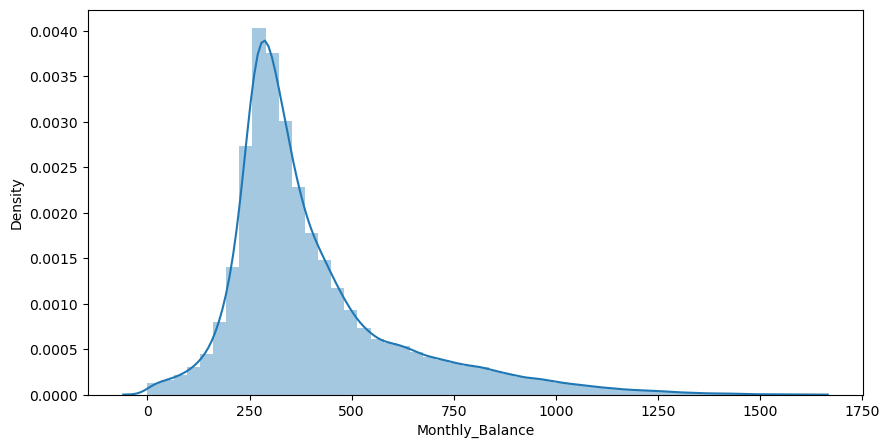

In [72]:
sns.distplot(combined_df['Monthly_Balance'], kde = True, hist = True)
plt.show()

In [73]:
# customer-wise median imputation

combined_df['Monthly_Balance'] = combined_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.median()))

In [74]:
combined_df['Monthly_Balance'].isnull().sum()

0

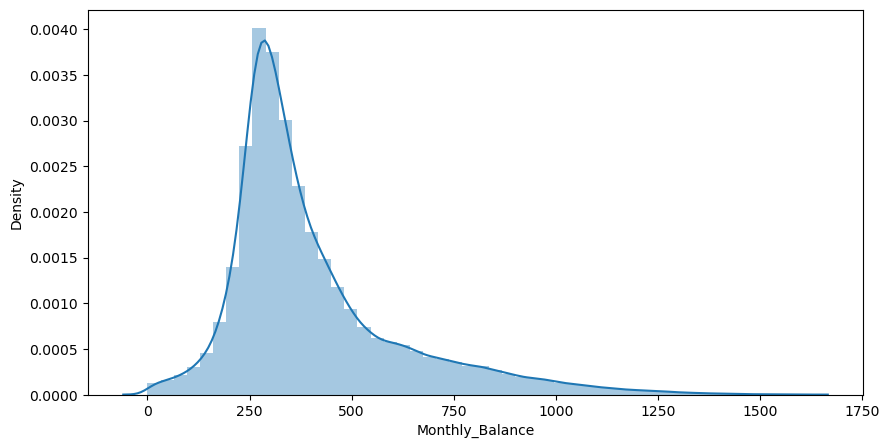

In [75]:
# plotting after imputation of missing values
sns.distplot(combined_df['Monthly_Balance'], kde = True, hist = True)
plt.show()

#### Num of Delayed Payment

In [76]:
combined_df['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
19.0      7949
17.0      7806
16.0      7721
15.0      7671
10.0      7670
          ... 
2728.0       1
1952.0       1
3580.0       1
4251.0       1
2034.0       1
Name: count, Length: 993, dtype: int64

In [77]:
combined_df['Num_of_Delayed_Payment'].isnull().sum()

14671

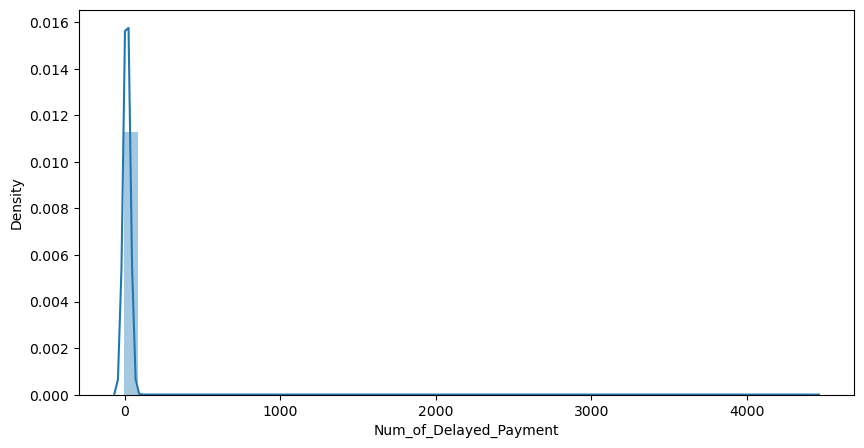

In [78]:
sns.distplot(combined_df['Num_of_Delayed_Payment'], kde = True, hist = True)
plt.show()

In [79]:
# customer-wise median imputation

combined_df['Num_of_Delayed_Payment'] = combined_df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.median()))

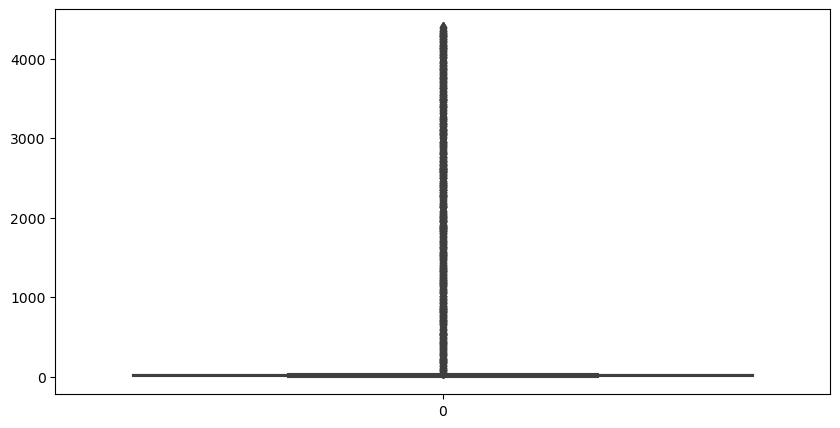

In [80]:
# plotting after imputation of missing values
sns.boxplot(combined_df['Num_of_Delayed_Payment'])
plt.show()

#### Changed Credit Limit

In [81]:
combined_df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
 11.50    197
 11.32    189
 8.22     189
 7.35     181
 10.06    178
         ... 
 10.42      1
-0.24       1
-0.32       1
 31.60      1
 29.17      1
Name: count, Length: 4596, dtype: int64

In [82]:
combined_df[combined_df.Changed_Credit_Limit < 0].shape[0]

2421

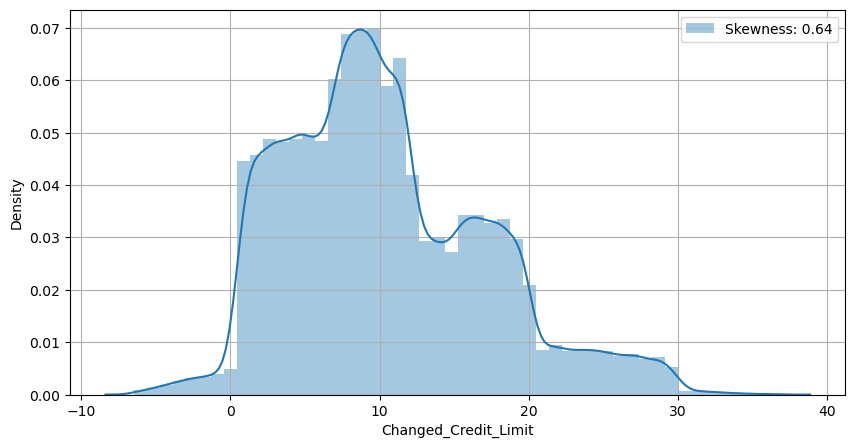

In [83]:
sns.distplot(combined_df['Changed_Credit_Limit'], label = 'Skewness: %.2f'%(combined_df['Changed_Credit_Limit'].skew()), 
             kde = True, hist = True)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [84]:
combined_df['Changed_Credit_Limit'].isnull().sum()

3150

In [85]:
combined_df['Changed_Credit_Limit'].max()

36.97

In [86]:
combined_df['Changed_Credit_Limit'] = combined_df['Changed_Credit_Limit'].apply(lambda x: x if 0 <= x <= 40 else np.nan)
combined_df['Changed_Credit_Limit'] = combined_df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x : x.fillna(x.median()))

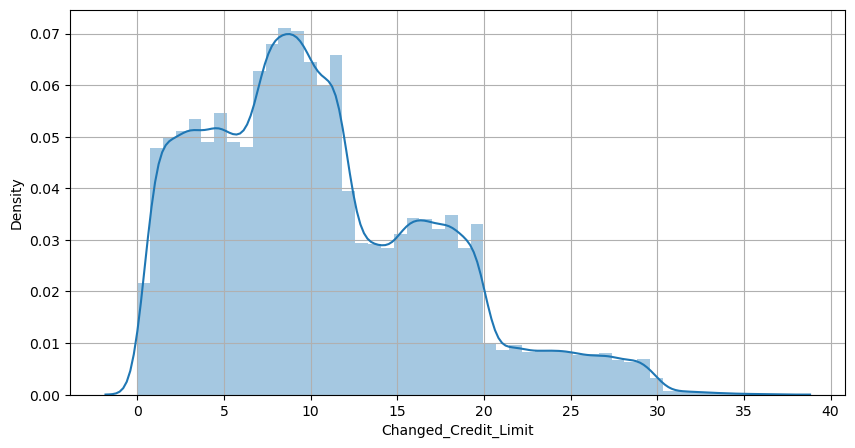

In [87]:
sns.distplot(combined_df['Changed_Credit_Limit'], kde = True, hist = True)
plt.grid()
plt.show()

#### No. of Credit Inquiries

In [88]:
combined_df['Num_Credit_Inquiries'].value_counts()

Num_Credit_Inquiries
4.0       15673
6.0       12486
3.0       12356
7.0       12353
8.0       11788
          ...  
1243.0        1
540.0         1
2150.0        1
1324.0        1
352.0         1
Name: count, Length: 1607, dtype: int64

In [89]:
# checking for missing values
combined_df['Num_Credit_Inquiries'].isnull().sum()

3000

In [90]:
# checking for negative values
combined_df[combined_df.Num_Credit_Inquiries < 0].shape[0]

0

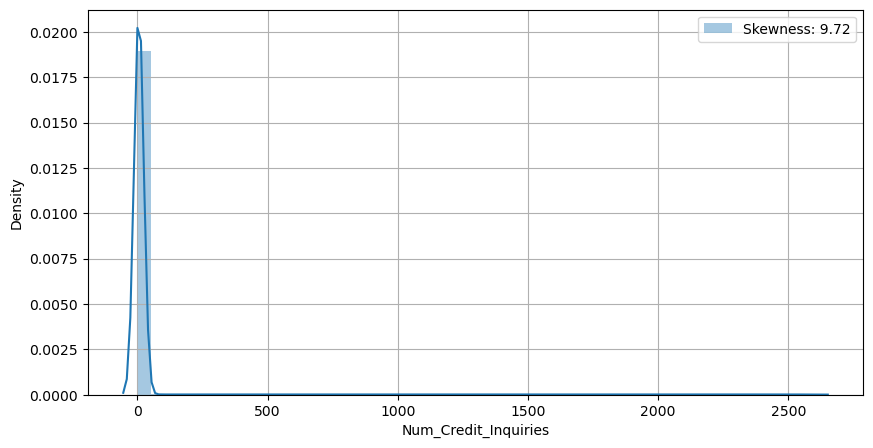

In [91]:
# plotting
sns.distplot(combined_df['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(combined_df['Num_Credit_Inquiries'].skew()), 
             kde = True, hist = True)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [92]:
# customer-wise median imputation

combined_df['Num_Credit_Inquiries'] = combined_df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.fillna(x.median()))

#### Credit Mix

In [93]:
combined_df['Credit_Mix'].value_counts()

Credit_Mix
Standard    54858
Good        36597
_           30000
Bad         28545
Name: count, dtype: int64

In [94]:
combined_df['Credit_Mix'] = combined_df['Credit_Mix'].replace('_', np.nan)

# Find the most recurring 'Credit Mix' values for each customer
    
combined_df['Credit_Mix'] = combined_df['Credit_Mix'].fillna(combined_df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x : x.mode().iloc[0]))

In [95]:
# Rechecking value counts again after missing values imputation
combined_df['Credit_Mix'].value_counts()

Credit_Mix
Standard    68772
Good        45576
Bad         35652
Name: count, dtype: int64

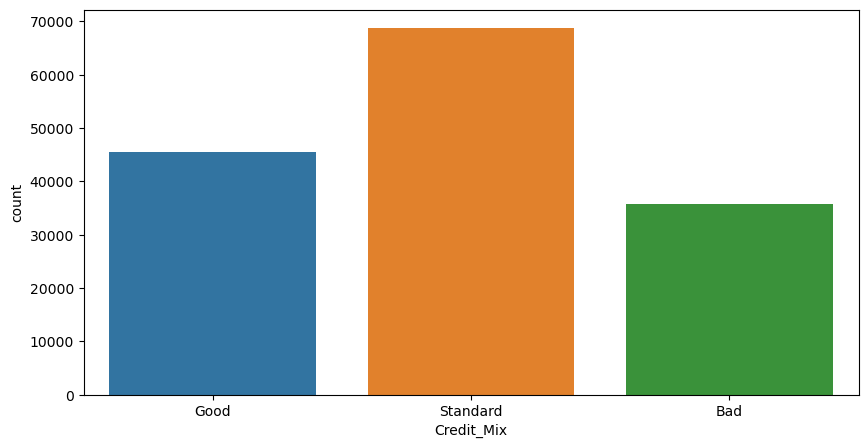

In [96]:
sns.countplot(x='Credit_Mix', data= combined_df)

plt.show()

#### Payment of Minimum Amount

In [97]:
combined_df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    78484
No     53516
NM     18000
Name: count, dtype: int64

#### Interest Rate

In [98]:
combined_df['Interest_Rate'].value_counts()

Interest_Rate
8       7515
5       7479
6       7089
12      6828
10      6799
        ... 
4985       1
2781       1
608        1
4817       1
4252       1
Name: count, Length: 2394, dtype: int64

In [99]:
combined_df[combined_df['Interest_Rate'] < 0].shape[0]

0

#### Credit History Age

In [100]:
combined_df['Credit_History_Age'].value_counts()

Credit_History_Age
17 Years and 11 Months    628
18 Years and 4 Months     621
18 Years and 3 Months     617
19 Years and 9 Months     615
18 Years and 2 Months     615
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 11 Months     15
34 Years and 0 Months      14
0 Years and 1 Months        2
Name: count, Length: 408, dtype: int64

In [101]:
combined_df['Credit_History_Age'].isnull().sum()

13500

In [102]:
import re

In [103]:
# Function to convert "X years and Y months" to float in format X.Y (Y is exact months)
def convert_to_float(value):
    if value is np.nan:
        return value
    # Initialize years and months to 0
    years = 0
    months = 0
    
    # Check if the input contains 'years' and 'months'
    years_match = re.search(r'(\d+)\s*Years?', value)
    months_match = re.search(r'(\d+)\s*Months?', value)
    
    # If years found, convert to integer
    if years_match:
        years = int(years_match.group(1))
    
    # If months found, convert to integer
    if months_match:
        months = int(months_match.group(1))
    
    # Return float in the form of X.Y where Y represents months
    return (f"{years}.{months:1d}")

# Apply the conversion function to the 'Credit_History_Age' column
combined_df['Credit_History_Age'] = combined_df['Credit_History_Age'].apply(convert_to_float)

In [104]:
combined_df['Credit_History_Age'].value_counts()

Credit_History_Age
17.11    628
18.4     621
18.3     617
19.9     615
18.2     615
        ... 
0.3       20
0.2       15
33.11     15
34.0      14
0.1        2
Name: count, Length: 408, dtype: int64

In [105]:
# customer-wise median imputation

combined_df['Credit_History_Age'] = combined_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(x.median()))

In [106]:
combined_df['Credit_History_Age'] = combined_df['Credit_History_Age'].astype('float')

In [107]:
combined_df['Credit_History_Age'].dtype

dtype('float64')

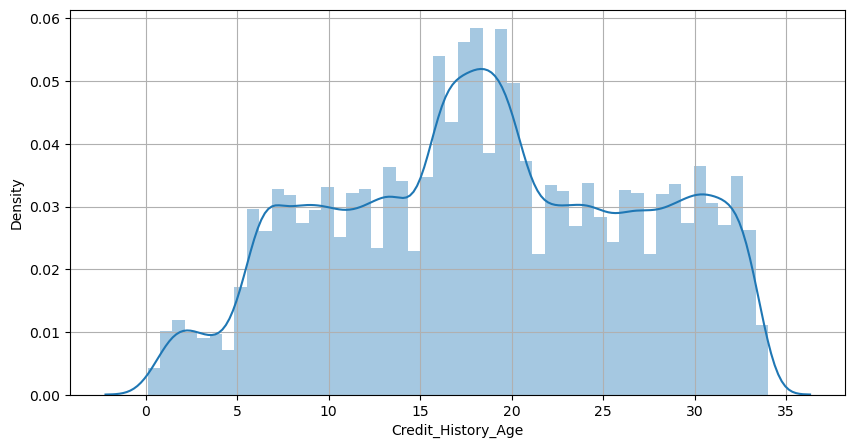

In [108]:
sns.distplot(combined_df['Credit_History_Age'], kde = True, hist = True)
plt.grid()
plt.show()

#### Delay from due date

In [109]:
combined_df[combined_df['Delay_from_due_date'] < 0].shape[0]

889

In [110]:
combined_df['Delay_from_due_date'].max()

67

In [111]:
combined_df['Delay_from_due_date'] = combined_df['Delay_from_due_date'].apply(lambda x: x if 0 <= x <= 70 else np.nan)
combined_df['Delay_from_due_date'] = combined_df.groupby('Customer_ID')['Delay_from_due_date'].transform(lambda x : x.fillna(x.median()))

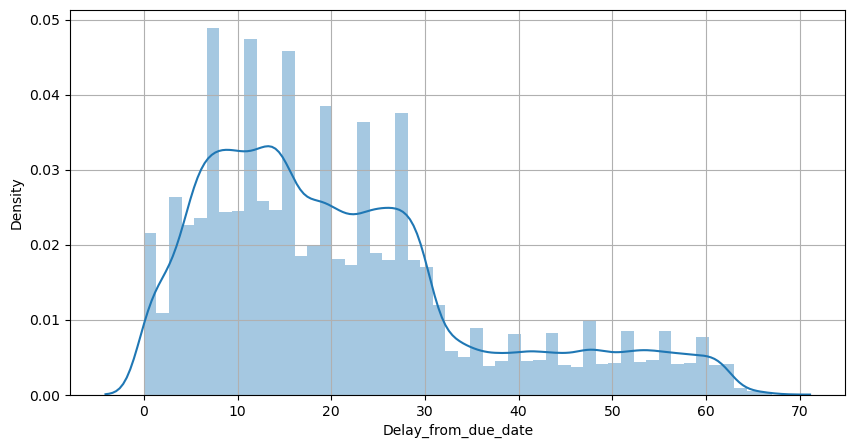

In [112]:
sns.distplot(combined_df['Delay_from_due_date'], kde = True, hist = True)
plt.grid()
plt.show()

#### Annual Income

In [113]:
combined_df['Annual_Income'].value_counts()

Annual_Income
36585.12       24
17816.75       23
20867.67       23
9141.63        23
95596.35       23
               ..
12484551.00     1
4155875.00      1
3353125.00      1
12626452.00     1
250738.00       1
Name: count, Length: 13902, dtype: int64

In [114]:
combined_df['Annual_Income'].isnull().sum()

10500

In [115]:
combined_df[combined_df['Annual_Income'] < 0].shape[0]

0

In [116]:
# customer-wise median imputation

combined_df['Annual_Income'] = combined_df.groupby('Customer_ID')['Annual_Income'].transform(lambda x: x.fillna(x.median()))

#### Outstanding Debt

In [117]:
combined_df['Outstanding_Debt'].value_counts()

Outstanding_Debt
1360.45    36
1109.03    35
1151.70    35
460.46     35
544.02     24
           ..
310.76     10
758.45     10
897.82     10
923.50      9
396.97      9
Name: count, Length: 12203, dtype: int64

In [118]:
combined_df['Outstanding_Debt'].isnull().sum()

1500

In [119]:
combined_df[combined_df['Outstanding_Debt'] < 0].shape[0]

0

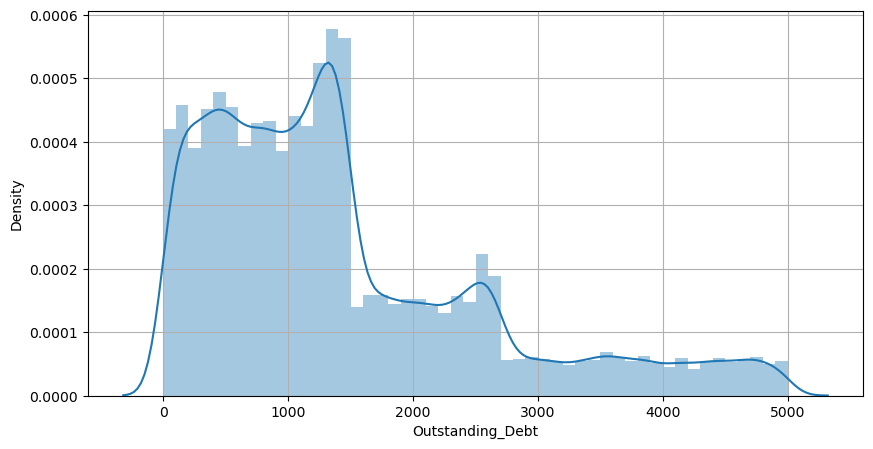

In [120]:
sns.distplot(combined_df['Outstanding_Debt'], kde = True, hist = True)
plt.grid()
plt.show()

In [121]:
# customer-wise median imputation

combined_df['Outstanding_Debt'] = combined_df.groupby('Customer_ID')['Outstanding_Debt'].transform(lambda x: x.fillna(x.median()))

#### Name

In [122]:
combined_df['Name'].value_counts()

Name
Stevex                 66
Langep                 65
Jessicad               59
Vaughanl               58
Raymondr               58
                       ..
Carrick Mollenkampe     7
Giuseppeh               7
Drivera                 7
Emi Emotor              7
Timothyl                6
Name: count, Length: 10139, dtype: int64

In [123]:
combined_df['Name'].isnull().sum()

15000

In [124]:
combined_df['Name'].fillna('Unknown', inplace=True)

In [125]:
combined_df['Name'].unique()

array(['Aaron Maashoh', 'Unknown', 'Rick Rothackerj', ...,
       'Chris Wickhamm', 'Sarah McBridec', 'Nicks'], dtype=object)

In [126]:
# checking information about all the columns again

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  int64  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

#### Credit Score (Target variable)

In [127]:
combined_df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

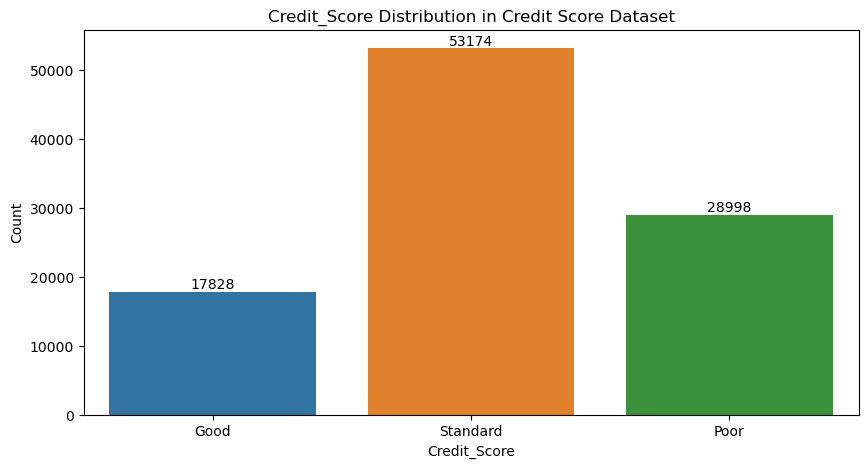

In [128]:
ax = sns.countplot(data = combined_df, x = 'Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

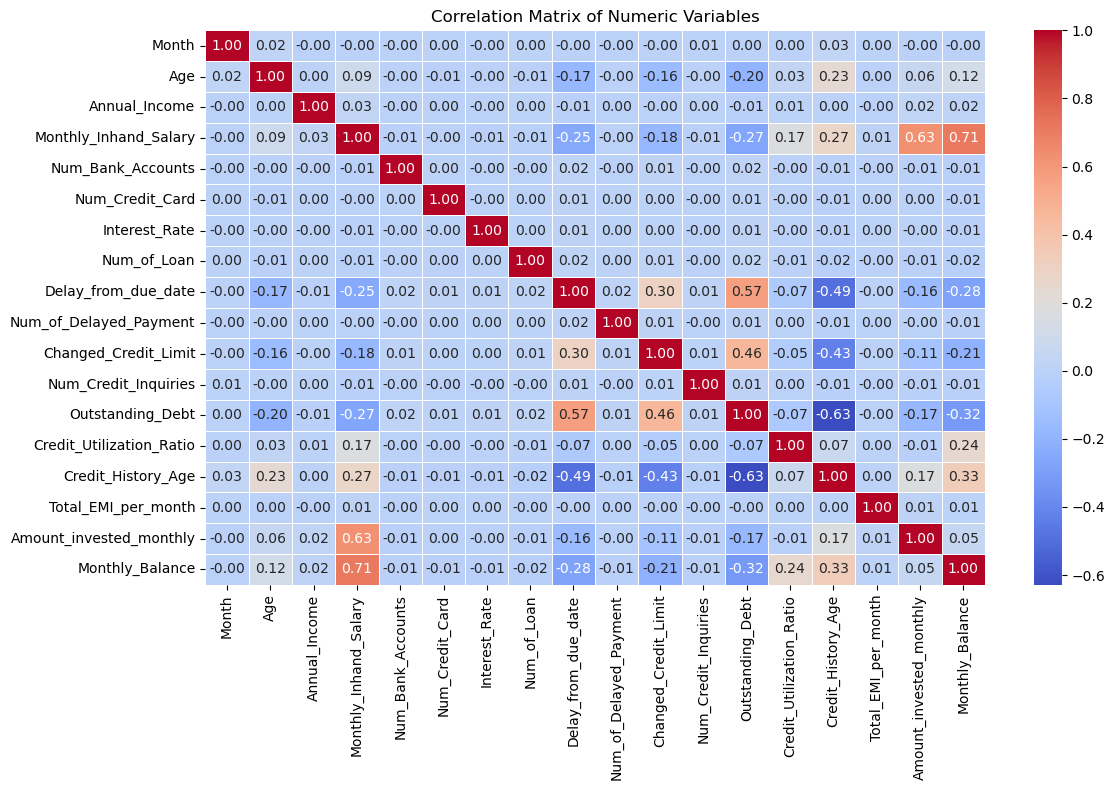

In [129]:
# Checking the correlation among different variables

numeric_df = combined_df.select_dtypes(include=['number'])

plt.figure(figsize = (12,8))
sns.heatmap(numeric_df.corr(), annot = True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

In [130]:
# creating a copy of combined dataframe after data cleaning
combined_df_cleaned = combined_df.copy()

In [131]:
# After cleaning, separate the data based on the 'set' column
train_cleaned = combined_df_cleaned[combined_df_cleaned['set'] == 'train'].drop(columns='set')
test_cleaned = combined_df_cleaned[combined_df_cleaned['set'] == 'test'].drop(columns='set')

# Display the separated train and test DataFrames
print("Cleaned Train Data:")
train_cleaned.head()

Cleaned Train Data:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,22.1,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,31.944960,22.5,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,22.3,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22.4,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.0,11.27,4.0,Good,809.98,24.797347,22.5,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [132]:
train_cleaned.shape

(100000, 28)

In [133]:
print("Cleaned Test Data:")
test_cleaned.head()

Cleaned Test Data:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,2022.0,Good,809.98,35.030402,22.9,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,9.0,13.27,4.0,Good,809.98,33.053114,22.1,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN
100002,0x160c,CUS_0xd40,11,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,12.27,4.0,Good,809.98,33.811894,22.5,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,NaN
100003,0x160d,CUS_0xd40,12,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4.0,5.0,11.27,4.0,Good,809.98,32.430559,23.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,NaN
100004,0x1616,CUS_0x21b1,9,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3.0,1.0,5.42,5.0,Good,605.03,25.926822,27.3,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN


In [134]:
test_cleaned.shape

(50000, 28)

In [135]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 100000 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay

In [136]:
# creating two copies of cleaned train dataset to do further analysis

cred_df = train_cleaned.copy()
cred_df2 = train_cleaned.copy()

In [137]:
cred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,100000.0,4.500000,2.291299e+00,1.000000,2.750000,4.500000,6.250000,8.000000e+00
Age,100000.0,33.329010,1.077426e+01,14.000000,24.000000,33.000000,42.000000,1.000000e+02
Annual_Income,100000.0,169663.837439,1.392029e+06,7005.930000,19453.420000,37551.780000,72712.200000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4197.393268,3.186540e+03,303.645417,1626.594167,3095.905000,5957.715000,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
...,...,...,...,...,...,...,...,...
Credit_Utilization_Ratio,100000.0,32.285173,5.116875e+00,20.000000,28.052567,32.305784,36.496663,5.000000e+01
Credit_History_Age,100000.0,18.381758,8.310666e+00,0.100000,12.100000,18.200000,25.100000,3.380000e+01
Total_EMI_per_month,100000.0,1403.118217,8.306041e+03,0.000000,30.306660,69.249473,161.224249,8.233100e+04
Amount_invested_monthly,100000.0,193.278093,1.940205e+02,0.000000,73.905176,129.415013,234.393007,1.977326e+03


In [138]:
# Dropping unnecessary columns

cred_df.drop(columns = ['Name', 'SSN','Type_of_Loan'], inplace = True)

In [139]:
cred_df.shape

(100000, 25)

In [140]:
# checking for missing values

cred_df.isnull().sum()

ID                         0
Customer_ID                0
Month                      0
Age                        0
Occupation                 0
                          ..
Total_EMI_per_month        0
Amount_invested_monthly    0
Payment_Behaviour          0
Monthly_Balance            0
Credit_Score               0
Length: 25, dtype: int64

### Statistical Analyses

##### 1. Check whether the Annual income across all the target variables is significantly the same. 
Let's fix the alpha is 0.05. Make sure the data is normal and the variance is equal. If not use a Non-parametric statistical test.

In [141]:
from scipy import stats
import statistics
import random

# to perform z-test
from statsmodels.stats import weightstats as stests

In [142]:
from scipy.stats import kruskal

In [143]:
# Shapiro-Wilk test for normality

H0 : "The data is normally distributed."
H1 : "The data is not normally distributed."
    
test_stat, p_val = stats.shapiro(cred_df['Annual_Income'])
print(f"Test statistic: {test_stat}")
print(f"P-value: {p_val}")

Test statistic: 0.07134103775024414
P-value: 0.0


Since p-value is less than 0.05, we can reject the null hypothesis. Hence, the distribution is not normal.

In [144]:
# Levene test for equality of variances

H0 : "All the population variances are equal."
H1 : "Atleast one of the population variance is different from the rest."
    
test_stat, p_val = stats.levene(cred_df[cred_df['Credit_Score'] == 'Poor']['Annual_Income'],
                                cred_df[cred_df['Credit_Score'] == 'Standard']['Annual_Income'],
                                cred_df[cred_df['Credit_Score'] == 'Good']['Annual_Income'])
print(f"Test statistic: {test_stat}")
print(f"P-value: {p_val}")

Test statistic: 3.735902437182424
P-value: 0.023854965879301096


Since p-value is less than 0.05, we can reject the null hypothesis. Hence, atleast one of the population variance is different from the rest.

**Null Hypothesis** = Ho = "Average annual income across all credit scores is same"

**Alternate Hypothesis** = Ha = "Average annual income across all credit scores is significantly different"

`Significance level = 0.05`

In [145]:
new_df = cred_df.filter(items = ['Credit_Score','Annual_Income'])
new_df.head()

,Credit_Score,Annual_Income
0,Good,19114.12
1,Good,19114.12
2,Good,19114.12
3,Good,19114.12
4,Good,19114.12


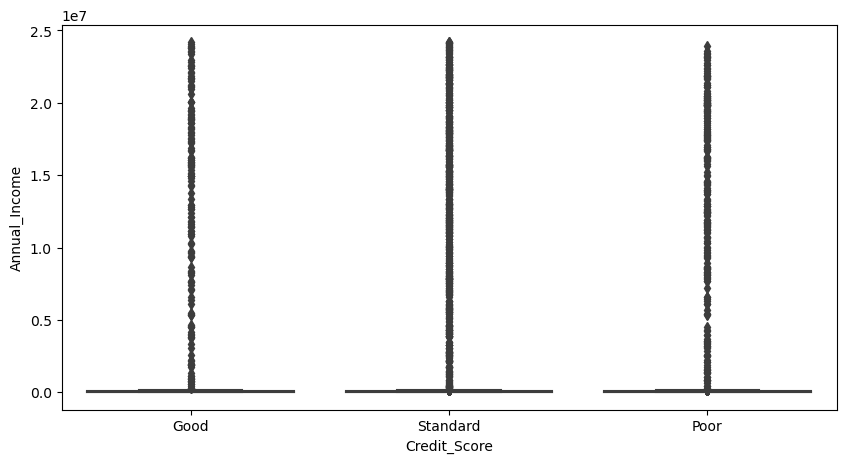

In [146]:
sns.boxplot(x = new_df['Credit_Score'], y= new_df['Annual_Income'])
plt.show()

In [147]:
# Checking the distribution of average annual income across different credit scores
new_df.groupby(['Credit_Score'])['Annual_Income'].mean()

Credit_Score
Good        181443.730176
Poor        146332.456569
Standard    178437.889698
Name: Annual_Income, dtype: float64

In [148]:
## -------------------- Kruskal- Wallis H-test ----------------------- ##

poor = new_df[new_df['Credit_Score'] == 'Poor']['Annual_Income']
standard = new_df[new_df['Credit_Score'] == 'Standard']['Annual_Income']
good = new_df[new_df['Credit_Score'] == 'Good']['Annual_Income']

stat, p_value = kruskal(poor, standard, good) 
print(f"Test statistic: {stat}")
print(f"P-value: {p_value}")

# Level of significance 
alpha = 0.05
# conclusion 
if p_value < alpha: 
    print('Reject Null Hypothesis (Significantly different across the target variables)') 
else: 
    print('Do not Reject Null Hypothesis (No significant difference across the target variables)')

Test statistic: 4199.014606401757
P-value: 0.0
Reject Null Hypothesis (Significantly different across the target variables)


##### 2. Check if there is an independence of the Occupation and Credit Score. The significant level is 0.05.

In [149]:
new_df1 = cred_df.filter(items = ['Occupation','Credit_Score'])
new_df1.head()

,Occupation,Credit_Score
0,Scientist,Good
1,Scientist,Good
2,Scientist,Good
3,Scientist,Good
4,Scientist,Good


In [150]:
cred_data = pd.crosstab(new_df1['Credit_Score'], new_df1['Occupation'], rownames = ['Credit_Score'],colnames = ['Occupation'])
cred_data

Occupation,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer
Credit_Score,,,,,,,,,,,,,,,
Good,1205,1233,1210,1164,1264,1185,1254,1259,1190,1107,1244,1192,1201,1224,896
Poor,2037,1855,1924,1804,2094,2033,1840,1965,1856,2044,1764,1786,2062,2027,1907
Standard,3502,3736,3586,3600,3506,3430,3442,3872,3386,3625,3712,3374,3481,3421,3501


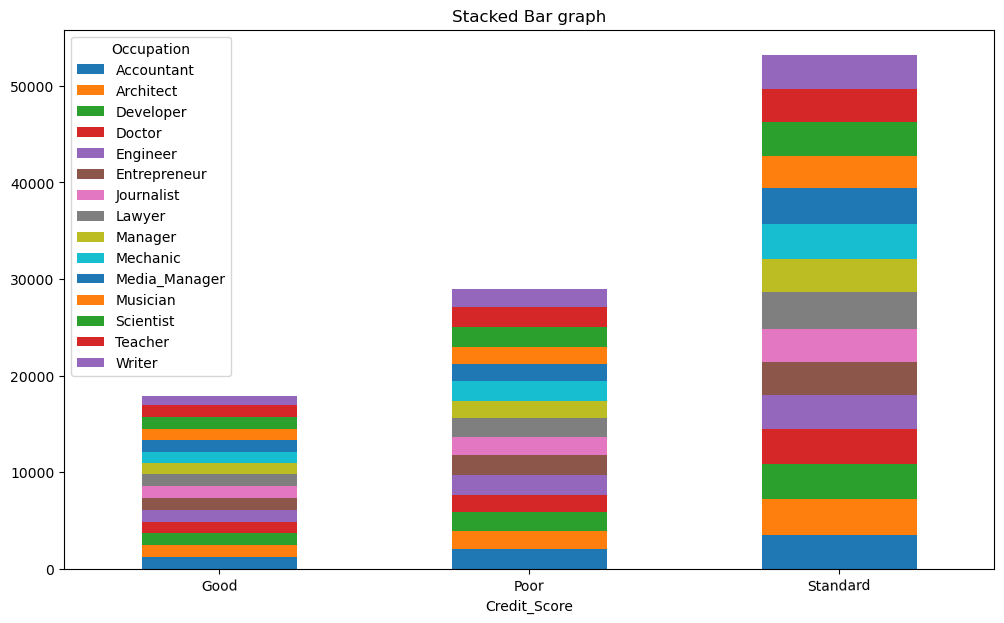

In [151]:
cred_data.plot(kind = 'bar', stacked= True, rot = 0.90, figsize = (12,7), title = 'Stacked Bar graph')
plt.show()

The **null and alternate hypothesis** is:

H0 : Occupation and Credit Score are independent.

H1 : There is some dependence in the Occupation and Credit Score.

`Significance level = 0.05`

In [152]:
# ------------- chi-square contingency ------------------ #

chi, p_val, dof, expected = stats.chi2_contingency(cred_data)
print(f"Test-statistic: {chi}")
print(f"P-value: {p_val}")

Test-statistic: 180.68588839512742
P-value: 2.907103747503745e-24


Since, p-value is way less than the significance level 0.05, we can reject the null hypothesis.

Hence, we have enough statistical evidence to conclude that there is some dependence (or relation) in the Occupation and Credit Scores.

##### 3. Check if there is a relationship between the Payment Behaviour and Credit Score.

In [153]:
new_df2 = cred_df.filter(items = ['Payment_Behaviour','Credit_Score'])
new_df2.head()

,Payment_Behaviour,Credit_Score
0,High_spent_Small_value_payments,Good
1,Low_spent_Large_value_payments,Good
2,Low_spent_Medium_value_payments,Good
3,Low_spent_Small_value_payments,Good
4,High_spent_Medium_value_payments,Good


In [154]:
cred_data1 = pd.crosstab(new_df2['Credit_Score'], new_df2['Payment_Behaviour'], rownames = ['Credit_Score'],colnames = ['Payment_Behaviour'])
cred_data1

Payment_Behaviour,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
Credit_Score,,,,,,
Good,3562,3882,2205,1947,2620,3612
Poor,3321,4981,3234,3052,4392,10018
Standard,8396,10554,6411,5819,7521,14473


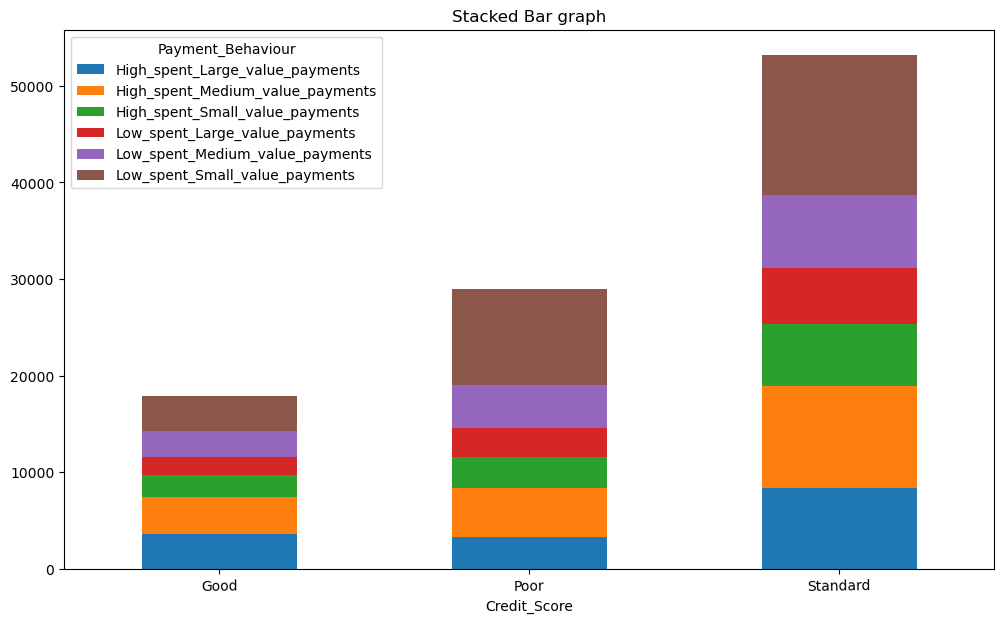

In [155]:
cred_data1.plot(kind = 'bar', stacked= True, rot = 0.90, figsize = (12,7), title = 'Stacked Bar graph')
plt.show()

The **null and alternate hypothesis** is:

H0 : There is no relation in Payment Behaviour and Credit Scores.

H1 : There is some significant relation in Payment Behaviour and Credit Scores.

`Significance level = 0.05`

In [156]:
# ------------- chi-square contingency ------------------ #

chi, p_val, dof, expected = stats.chi2_contingency(cred_data1)
print(f"Test-statistic: {chi}")
print(f"P-value: {p_val}")

Test-statistic: 1543.8471365646956
P-value: 0.0


Since p-value is less than 0.05, we can reject the null hypothesis. 

Hence, we have enough statistical evidence to conclude that there is a significant relationship in Payment Behaviour and Credit Scores.

##### 4. Check Statistically that the Credit_Utilization_Ratio median values are significantly not different across the target variable classes. 

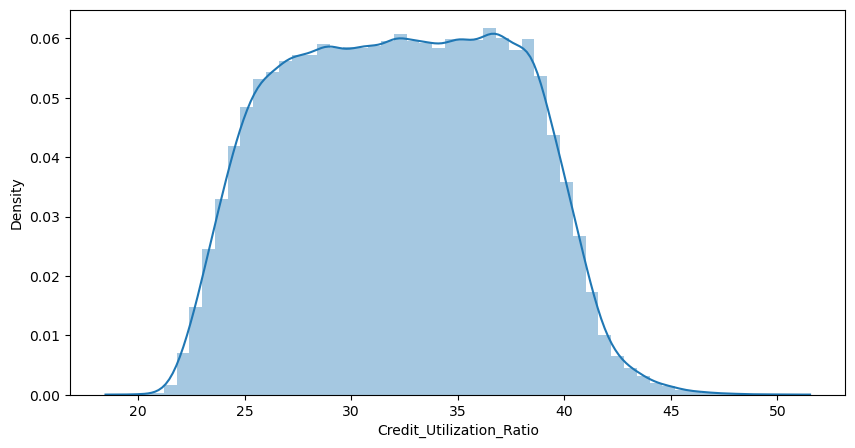

In [157]:
# checking the distribution of variable

sns.distplot(cred_df['Credit_Utilization_Ratio'], hist = True, kde= True)
plt.show()

In [158]:
new_df3 = cred_df.filter(items = ['Credit_Score','Credit_Utilization_Ratio'])
new_df3.head()

,Credit_Score,Credit_Utilization_Ratio
0,Good,26.822620
1,Good,31.944960
2,Good,28.609352
3,Good,31.377862
4,Good,24.797347


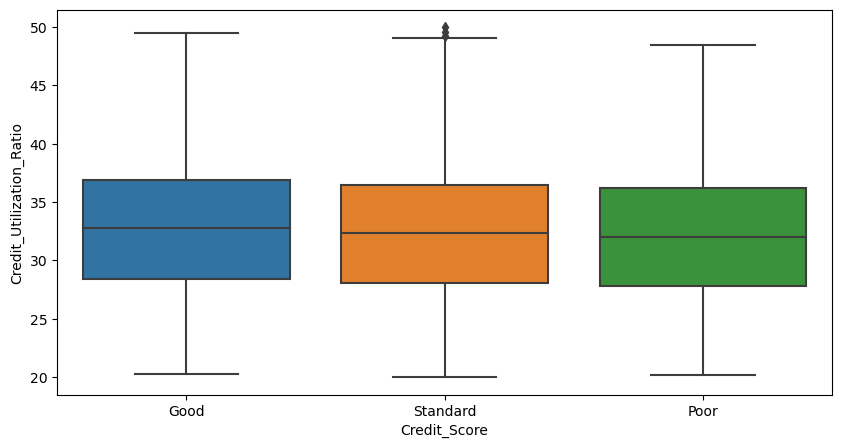

In [159]:
sns.boxplot(x = new_df3['Credit_Score'],y = new_df3['Credit_Utilization_Ratio'])
plt.show()

In [160]:
new_df3.Credit_Score.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [161]:
new_df3.groupby('Credit_Score')['Credit_Utilization_Ratio'].median()

Credit_Score
Good        32.740826
Poor        32.006945
Standard    32.326765
Name: Credit_Utilization_Ratio, dtype: float64

The **null and alternate hypothesis** is:

H0 : Credit Utilization Ratio median values are not different (or same) across different classes of Credit scores.

H1 : Credit Utilization Ratio median values are significantly different across different classes of Credit scores.

In [162]:
# ---------------- One-Way ANOVA test --> It is used for comparing means across different groups. #

poor = new_df3[new_df3['Credit_Score'] == 'Poor']['Credit_Utilization_Ratio']
standard = new_df3[new_df3['Credit_Score'] == 'Standard']['Credit_Utilization_Ratio']
good = new_df3[new_df3['Credit_Score'] == 'Good']['Credit_Utilization_Ratio']

f_stat, p_val = stats.f_oneway(poor, standard, good)
print(f"Test-statistic: {f_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_value > alpha:
    print("Fail to reject the null hypothesis. Mean values are not significantly different across Credit Scores classes.")
else:
    print("Reject the null hypothesis. Mean values are significantly different across Credit Scores classes.")

Test-statistic: 105.29672169033606
P-value: 2.0811372175521815e-46
Reject the null hypothesis. Mean values are significantly different across Credit Scores classes.


**Mood's median test** is a `non-parametric test` to compare two or more independent samples. It is an alternative method to ANOVA. However, unlike ANOVA, it does not assume normality in the samples, and so is useful when comparing medians where normality is questionable.

In [163]:
# Perform Mood's Median test --> This is a specific test for comparing medians across different groups. 
                                # It checks whether the medians of the groups are statistically different.
    
stat, p_value, med, table = stats.median_test(new_df3[new_df3['Credit_Score'] == 'Poor']['Credit_Utilization_Ratio'],
                                        new_df3[new_df3['Credit_Score'] == 'Standard']['Credit_Utilization_Ratio'],
                                        new_df3[new_df3['Credit_Score'] == 'Good']['Credit_Utilization_Ratio'])

print(f"Mood's Median Test statistic: {stat}")
print(f"P-value: {p_value}")
print(f"Overall Median: {med}")

# Interpretation
if p_value > alpha:
    print("Fail to reject the null hypothesis. Median values are not significantly different across Credit Scores classes.")
else:
    print("Reject the null hypothesis. Median values are significantly different across Credit Scores classes.")

Mood's Median Test statistic: 83.35019993138445
P-value: 7.956719574793182e-19
Overall Median: 32.30578367171092
Reject the null hypothesis. Median values are significantly different across Credit Scores classes.


### Encoding Categorical variables

In [164]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [165]:
cat_df = cred_df.select_dtypes(include = 'object').drop(columns = ['ID','Customer_ID','Credit_Mix','Payment_of_Min_Amount'])
cat_df.head()

,Occupation,Payment_Behaviour,Credit_Score
0,Scientist,High_spent_Small_value_payments,Good
1,Scientist,Low_spent_Large_value_payments,Good
2,Scientist,Low_spent_Medium_value_payments,Good
3,Scientist,Low_spent_Small_value_payments,Good
4,Scientist,High_spent_Medium_value_payments,Good


In [166]:
# List of columns to one-hot encode
categorical_cols = ['Occupation','Payment_Behaviour']

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(cat_df, columns= categorical_cols, dtype = 'int')

df_encoded.head()

,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [167]:
# Create a mapping dictionary
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Apply the mapping to the 'target' column
df_encoded['Credit_Score'] = cat_df['Credit_Score'].map(target_mapping)

df_encoded.head()

,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [168]:
# Concatenate the encoded columns with the original dataframe
# Dropping the original categorical columns before concatenation

cred_df_final = pd.concat([cred_df.drop(['Credit_Mix','Payment_of_Min_Amount','Occupation',
                                         'Payment_Behaviour','Credit_Score'], axis=1), df_encoded], axis=1)
cred_df_final.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0x1602,CUS_0xd40,1,23.0,19114.12,1824.843333,3,4,3,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,22.1,49.574949,80.415295,312.494089,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0x1603,CUS_0xd40,2,23.0,19114.12,1824.843333,3,4,3,4.0,3.0,6.0,11.27,4.0,809.98,31.944960,22.5,49.574949,118.280222,284.629162,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0x1604,CUS_0xd40,3,23.0,19114.12,1824.843333,3,4,3,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,22.3,49.574949,81.699521,331.209863,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0x1605,CUS_0xd40,4,23.0,19114.12,1824.843333,3,4,3,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,22.4,49.574949,199.458074,223.451310,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0x1606,CUS_0xd40,5,23.0,19114.12,1824.843333,3,4,3,4.0,6.0,6.0,11.27,4.0,809.98,24.797347,22.5,49.574949,41.420153,341.489231,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [169]:
cred_df_final.duplicated().sum()

0

In [170]:
cred_df_final.groupby(["Credit_Score"]).count()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
Credit_Score,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998,28998
1,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174,53174
2,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828,17828


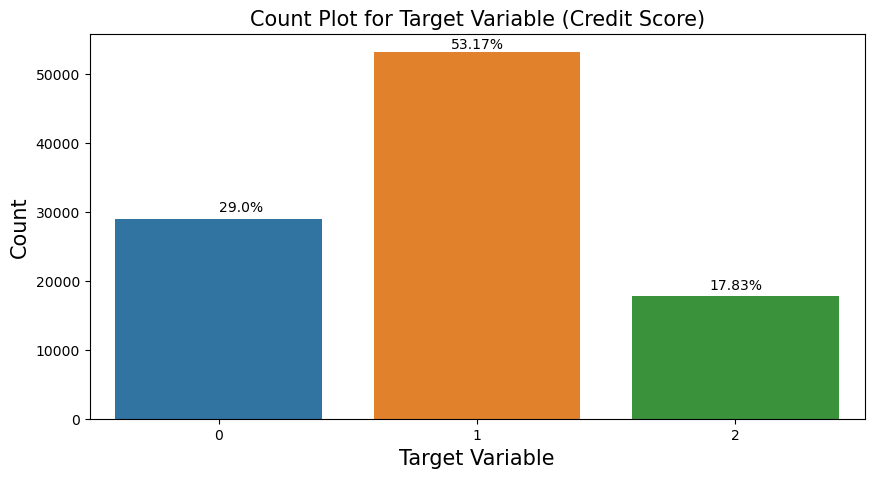

In [171]:
# consider only the target variable
df_target = cred_df_final['Credit_Score']

# get counts of 0's, 1's, 2's in the 'Credit score' variable
df_target.value_counts()

# plot the countplot of the variable 'Credit score'
sns.countplot(x = df_target)

# use below code to print the percentage values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text to be printed
plt.text(x = 0.00, y = df_target.value_counts()[0] + 1000, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.90, y = df_target.value_counts()[1] + 500, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = 1.90, y = df_target.value_counts()[2] + 1000, s = str(round((df_target.value_counts()[2])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Credit Score)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [172]:
id_df = cred_df_final.iloc[:,0:2]
id_df.head()

,ID,Customer_ID
0,0x1602,CUS_0xd40
1,0x1603,CUS_0xd40
2,0x1604,CUS_0xd40
3,0x1605,CUS_0xd40
4,0x1606,CUS_0xd40


In [173]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### Performing Log Transformation

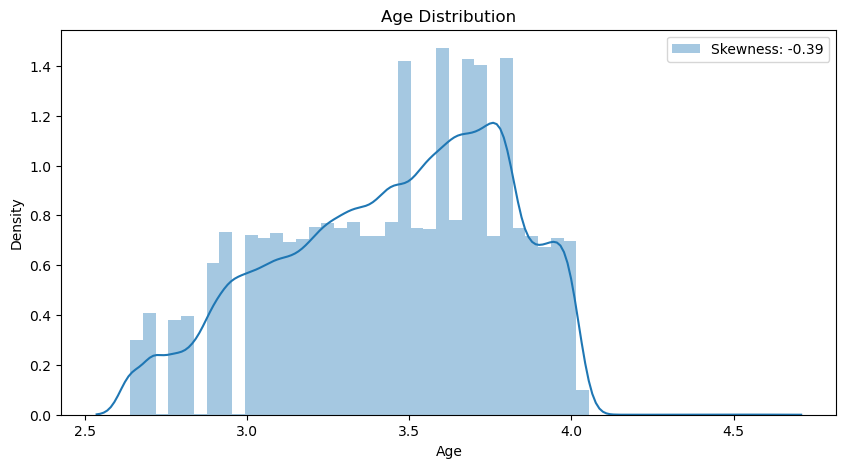

In [174]:
# Age column

modified_age = [np.log(age) if age > 0 else 0 for age in cred_df_final['Age']]
cred_df_final['Age'] = modified_age

sns.distplot(cred_df_final['Age'], label = 'Skewness: %.2f'%(cred_df_final['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Age Distribution')
plt.show()

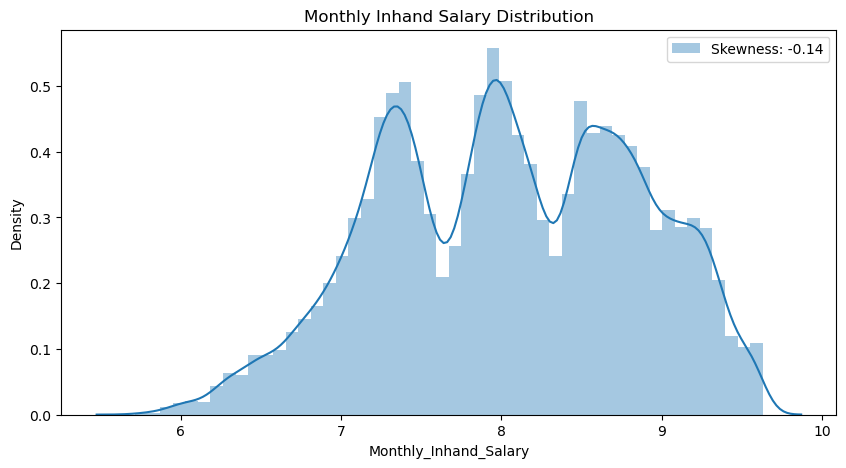

In [175]:
# Monthly inhand salary column

modified_salary = [np.log(salary) if salary > 0 else 0 for salary in cred_df_final['Monthly_Inhand_Salary']]
cred_df_final['Monthly_Inhand_Salary'] = modified_salary

sns.distplot(cred_df_final['Monthly_Inhand_Salary'], 
             label = 'Skewness: %.2f'%(cred_df_final['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Monthly Inhand Salary Distribution')
plt.show()

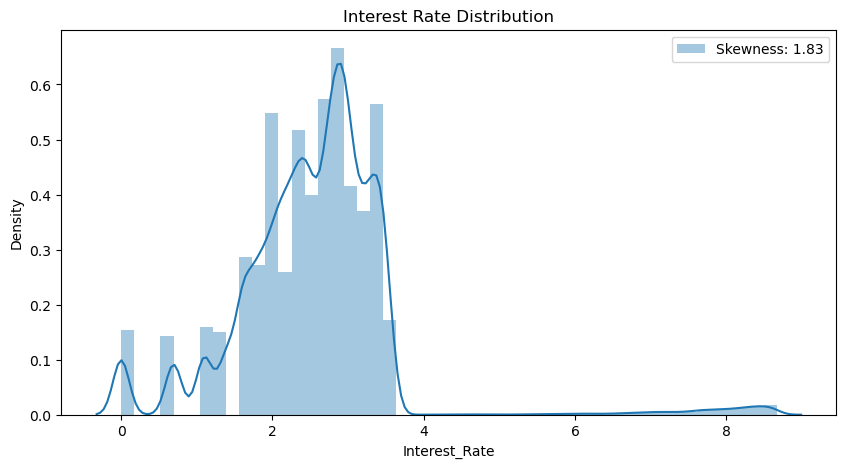

In [176]:
# Interest rate column

modified_interest = [np.log(interest) if interest > 0 else 0 for interest in cred_df_final['Interest_Rate']]
cred_df_final['Interest_Rate'] = modified_interest

# plotting the distribution
sns.distplot(cred_df_final['Interest_Rate'], label = 'Skewness: %.2f'%(cred_df_final['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')
plt.show()

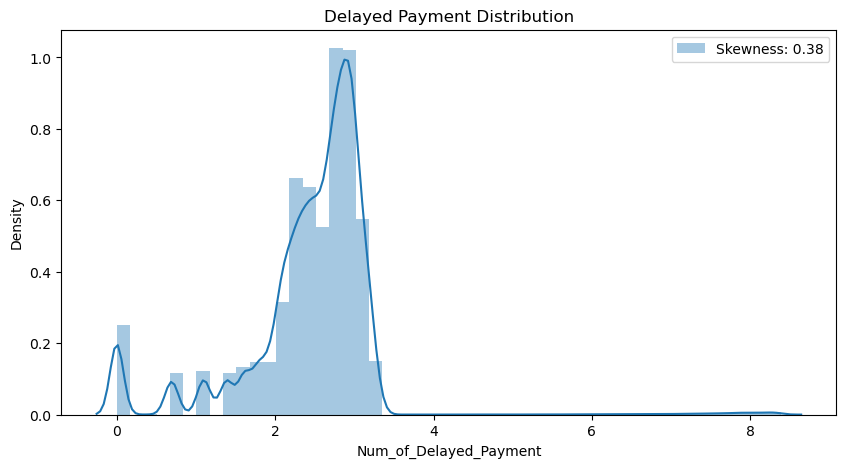

In [177]:
# Delayed payment column

modified_payment = [np.log(payment) if payment > 0 else 0 for payment in cred_df_final['Num_of_Delayed_Payment']]
cred_df_final['Num_of_Delayed_Payment'] = modified_payment

# plotting the distribution
sns.distplot(cred_df_final['Num_of_Delayed_Payment'], 
             label = 'Skewness: %.2f'%(cred_df_final['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')
plt.show()

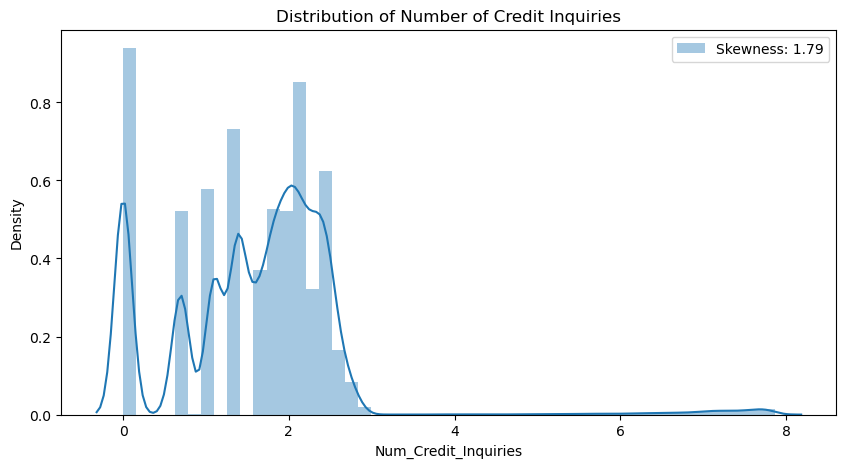

In [178]:
# Credit Inquiries column

modified_inquiries = [np.log(inquiries) if inquiries > 0 else 0 for inquiries in cred_df_final['Num_Credit_Inquiries']]
cred_df_final['Num_Credit_Inquiries'] = modified_inquiries

sns.distplot(cred_df_final['Num_Credit_Inquiries'], 
             label = 'Skewness: %.2f'%(cred_df_final['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of Number of Credit Inquiries')
plt.show()

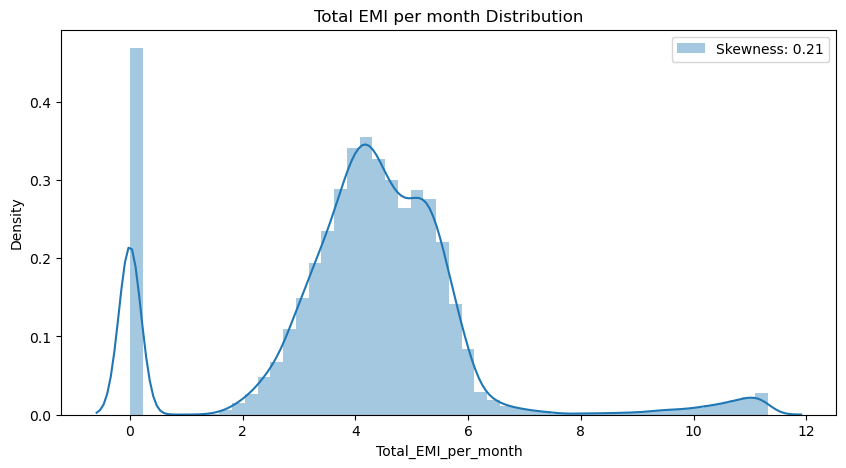

In [179]:
# Total EMI per month

modified_emi = [np.log(emi) if emi > 0 else 0 for emi in cred_df_final['Total_EMI_per_month']]
cred_df_final['Total_EMI_per_month'] = modified_emi

sns.distplot(cred_df_final['Total_EMI_per_month'], label = 'Skewness: %.2f'%(cred_df_final['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')
plt.show()

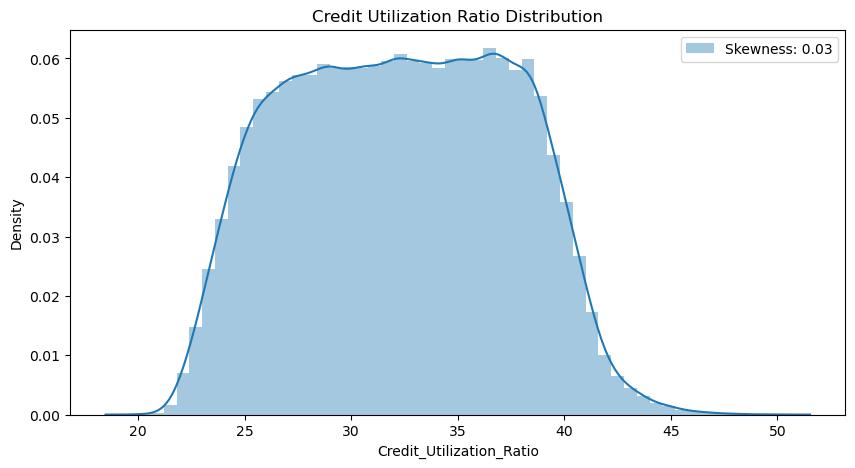

In [180]:
# Credit utilization ratio column ---- no need to log transform

sns.distplot(cred_df_final['Credit_Utilization_Ratio'], 
             label = 'Skewness: %.2f'%(cred_df_final['Credit_Utilization_Ratio'].skew()))
plt.legend(loc = 'best')
plt.title('Credit Utilization Ratio Distribution')
plt.show()

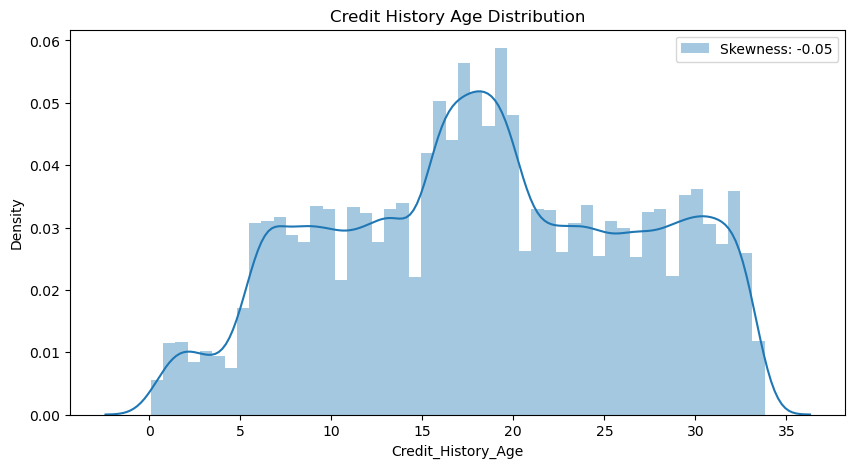

In [181]:
# Credit History Age column ---- least skewed so no need to log transform

sns.distplot(cred_df_final['Credit_History_Age'], 
             label = 'Skewness: %.2f'%(cred_df_final['Credit_History_Age'].skew()))
plt.legend(loc = 'best')
plt.title('Credit History Age Distribution')
plt.show()

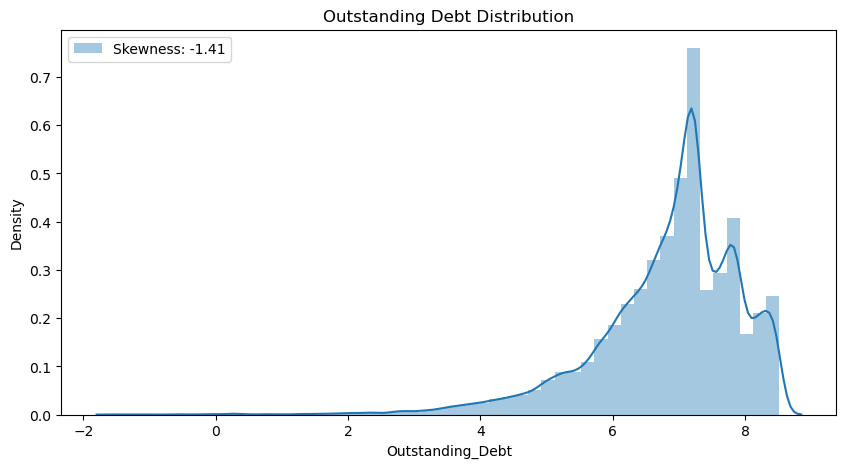

In [182]:
# Outstanding Debt

modified_debt = [np.log(debt) if debt > 0 else 0 for debt in cred_df_final['Outstanding_Debt']]
cred_df_final['Outstanding_Debt'] = modified_debt

sns.distplot(cred_df_final['Outstanding_Debt'], label = 'Skewness: %.2f'%(cred_df_final['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title('Outstanding Debt Distribution')
plt.show()

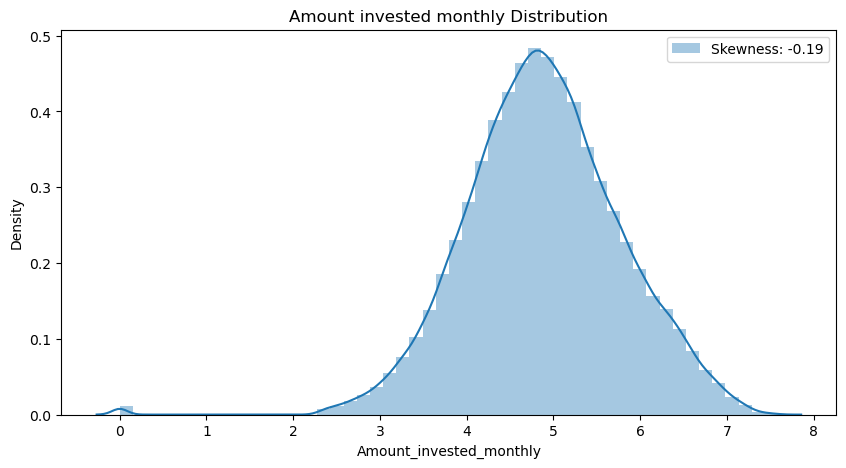

In [183]:
# Amount Invested monthly column

modified_amount = [np.log(amount) if amount > 0 else 0 for amount in cred_df_final['Amount_invested_monthly']]
cred_df_final['Amount_invested_monthly'] = modified_amount

sns.distplot(cred_df_final['Amount_invested_monthly'], 
             label = 'Skewness: %.2f'%(cred_df_final['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')
plt.show()

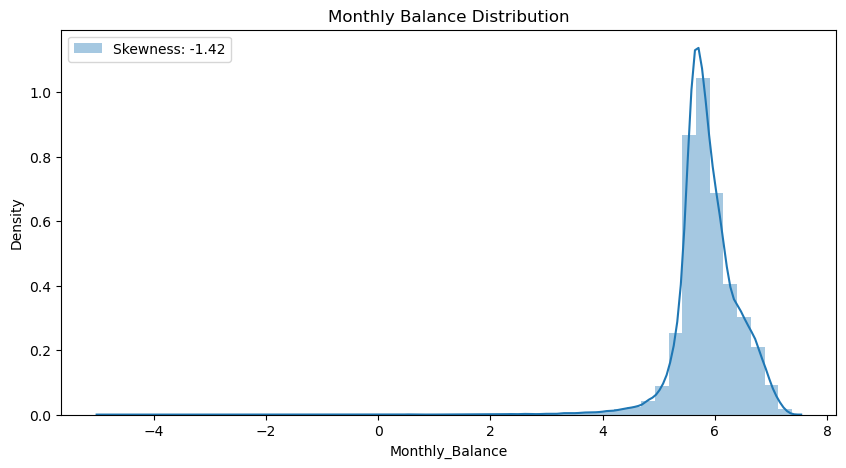

In [184]:
# Monthly Balance column

modified_balance = [np.log(balance) if balance > 0 else 0 for balance in cred_df_final['Monthly_Balance']]
cred_df_final['Monthly_Balance'] = modified_balance

sns.distplot(cred_df_final['Monthly_Balance'], 
             label = 'Skewness: %.2f'%(cred_df_final['Monthly_Balance'].skew()))
plt.legend(loc = 'best')
plt.title('Monthly Balance Distribution')
plt.show()

In [185]:
cred_df_final.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0x1602,CUS_0xd40,1,3.135494,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.945910,11.27,1.386294,6.69701,26.822620,22.1,3.903486,4.387204,5.744586,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0x1603,CUS_0xd40,2,3.135494,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.791759,11.27,1.386294,6.69701,31.944960,22.5,3.903486,4.773057,5.651187,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0x1604,CUS_0xd40,3,3.135494,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.945910,11.27,1.386294,6.69701,28.609352,22.3,3.903486,4.403048,5.802752,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0x1605,CUS_0xd40,4,3.135494,19114.12,7.509249,3,4,1.098612,4.0,5.0,1.386294,6.27,1.386294,6.69701,31.377862,22.4,3.903486,5.295604,5.409194,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0x1606,CUS_0xd40,5,3.135494,19114.12,7.509249,3,4,1.098612,4.0,6.0,1.791759,11.27,1.386294,6.69701,24.797347,22.5,3.903486,3.723768,5.833316,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Feature Scaling

In [186]:
df_log_transformed = cred_df_final.iloc[ : ,2:20]
df_log_transformed.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,1,3.135494,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.945910,11.27,1.386294,6.69701,26.822620,22.1,3.903486,4.387204,5.744586
1,2,3.135494,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.791759,11.27,1.386294,6.69701,31.944960,22.5,3.903486,4.773057,5.651187
2,3,3.135494,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.945910,11.27,1.386294,6.69701,28.609352,22.3,3.903486,4.403048,5.802752
3,4,3.135494,19114.12,7.509249,3,4,1.098612,4.0,5.0,1.386294,6.27,1.386294,6.69701,31.377862,22.4,3.903486,5.295604,5.409194
4,5,3.135494,19114.12,7.509249,3,4,1.098612,4.0,6.0,1.791759,11.27,1.386294,6.69701,24.797347,22.5,3.903486,3.723768,5.833316


In [187]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
num_features_scaled = scaler.fit_transform(df_log_transformed)

# convert the array back to a dataframe
# pass the required column names to the parameter 'columns'
scaled_num_df = pd.DataFrame(num_features_scaled, columns = df_log_transformed.columns)

# Concatenate the scaled numerical features with the original DataFrame containing categorical features
final_df = pd.concat([id_df.reset_index(drop=True), scaled_num_df, df_encoded.reset_index(drop=True)], axis=1)

# summarize the dataframe
# use 'round()' to consider the integer values
round(final_df.describe())

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
mean,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-2.0,-2.0,-0.0,-3.0,-0.0,-0.0,-2.0,-0.0,-1.0,-3.0,-2.0,-1.0,-8.0,-2.0,-2.0,-2.0,-6.0,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-1.0,-1.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,2.0,3.0,17.0,2.0,15.0,11.0,6.0,26.0,3.0,7.0,4.0,6.0,2.0,3.0,2.0,4.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [188]:
# checking the shape of final dataframe 

final_df.shape

(100000, 42)

In [189]:
# creating 2 copies of this finally encoded dataframe

final_df1 = final_df.copy()
final_df2 = final_df.copy()

In [190]:
# Concatenate the scaled numerical features with the original DataFrame containing relevant categorical features

final_cred_df = pd.concat([scaled_num_df, df_encoded.reset_index(drop=True)], axis=1)

In [191]:
final_cred_df.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',


### Train-Test dataset split

In [192]:
# building the Logistic Regression model
X = final_cred_df.loc[ : , final_cred_df.columns != 'Credit_Score']
y = final_cred_df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 1)

# check the dimensions of train and test subsets
print(f"x train shape: {X_train.shape}")
print(f"x test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

x train shape: (70000, 39)
x test shape: (30000, 39)
y train shape: (70000,)
y test shape: (30000,)


## Logistic Regression Model

In [193]:
from matplotlib.colors import ListedColormap

In [194]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [195]:
# Building logistic regression to predict the credit scores

lr_model = LogisticRegression(random_state = 1)
lr_model.fit(X_train, y_train)

# Making predictions
y_predict = lr_model.predict(X_test)

# Model accuracy
model_acc_score = round(100 * accuracy_score(y_test, y_predict), 2)
print(f"Model accuracy score: {model_acc_score}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(f"Confusion matrix: \n{cm}")

Model accuracy score: 61.86%
Confusion matrix: 
[[ 4290  4043   350]
 [ 2154 12598  1238]
 [  111  3545  1671]]


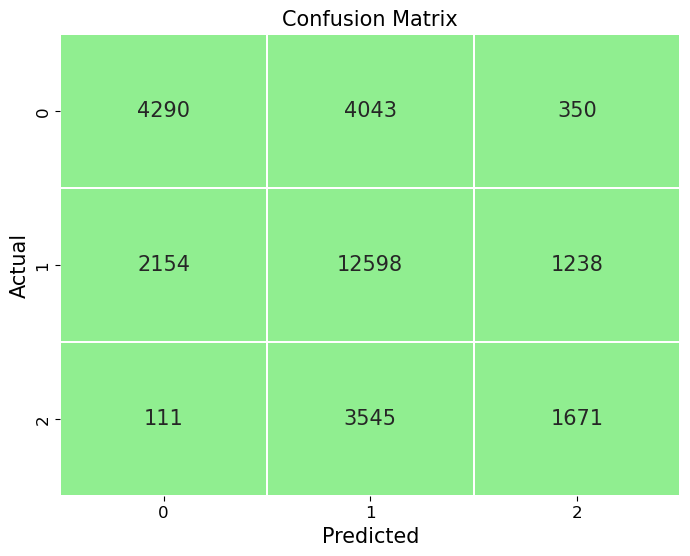

In [196]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [197]:
# call the function to print the classification report

acc_table = get_test_report(lr_model, test_data = X_test.values)
print(acc_table)

              precision    recall  f1-score   support

           0       0.65      0.49      0.56      8683
           1       0.62      0.79      0.70     15990
           2       0.51      0.31      0.39      5327

    accuracy                           0.62     30000
   macro avg       0.60      0.53      0.55     30000
weighted avg       0.61      0.62      0.60     30000



##### Tabulate the results

In [198]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
results = pd.DataFrame(columns=['Model_Name', 'Model_Accuracy', 'Model_Precision', 'Model_Recall'])

# print the score card
results

,Model_Name,Model_Accuracy,Model_Precision,Model_Recall


In [201]:
# compile the required information
log_reg_metrics = pd.Series({
                     'Model_Name': "Logistic Regression",
                     'Model_Accuracy': model_acc_score,
                     'Model_Precision': round(100 * precision_score(y_test, y_predict, average = 'weighted'), 2),
                     'Model_Recall': round(100 * recall_score(y_test, y_predict, average = 'weighted'), 2)      
                       })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
results = results._append(log_reg_metrics, ignore_index=True)

# print the result table
results

,Model_Name,Model_Accuracy,Model_Precision,Model_Recall
0,Logistic Regression,61.86,61.31,61.86


## K-Nearest Neighbors (KNN)

In [202]:
# Finding the optimal value of k using accuracy score
k_values = range(1, 21)
accuracy_scores = []

# Train and evaluate the model for each value of k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test.values)
    knn_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
    accuracy_scores.append(knn_accuracy)

# Determining the best k
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"The optimal value of k is {optimal_k}")
print(f"KNN Model accuracy: {knn_accuracy}")

The optimal value of k is 18
KNN Model accuracy: 66.28


KNN Confusion Matrix:
 [[ 5515  2763   405]
 [ 2376 12456  1158]
 [  108  3307  1912]]


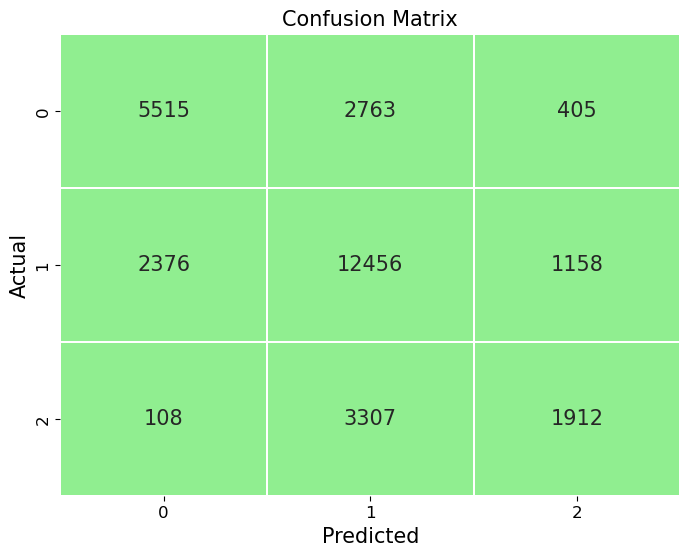

In [203]:
knn_cm = confusion_matrix(y_test, y_pred)

# Evaluating the model
print("KNN Confusion Matrix:\n", knn_cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [204]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model, test_data = X_test.values)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      8683
           1       0.67      0.78      0.72     15990
           2       0.55      0.36      0.43      5327

    accuracy                           0.66     30000
   macro avg       0.64      0.59      0.61     30000
weighted avg       0.66      0.66      0.65     30000



In [206]:
# compile the required information
knn_metrics = pd.Series({
                     'Model_Name': "K-Nearest Neighbors",
                     'Model_Accuracy': knn_accuracy,
                     'Model_Precision': round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2),
                     'Model_Recall': round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)      
                       })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
results = results._append(knn_metrics, ignore_index=True)

# print the result table
results

,Model_Name,Model_Accuracy,Model_Precision,Model_Recall
0,Logistic Regression,61.86,61.31,61.86
1,K-Nearest Neighbors,66.28,65.56,66.28


## Gaussian Naive Bayes' Model

In [207]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
gb_model = GaussianNB()
gb_model.fit(X_train, y_train)

predictions= gb_model.predict(X_test)

# Confusion matrix
gb_cm = confusion_matrix(y_test, predictions)
print(f"Confusion matrix: \n{gb_cm}")

Confusion matrix: 
[[6154 1374 1155]
 [4506 7408 4076]
 [ 242 1445 3640]]


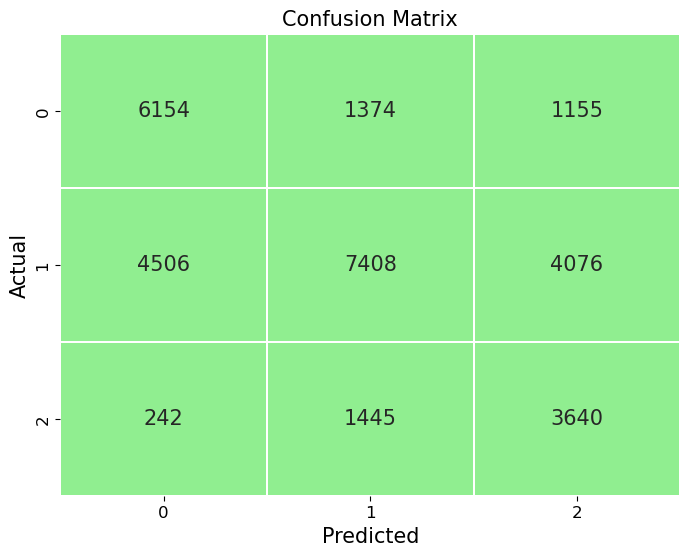

In [208]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [209]:
gb_acc = round(100 * accuracy_score(y_test, predictions), 2)

print(f"GaussianNB Model Accuracy: {gb_acc}%")

GaussianNB Model Accuracy: 57.34%


In [210]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gaussian NB model to the function
gb_test_report = get_test_report(gb_model, test_data = X_test)

# print the performace measures
print(gb_test_report)

              precision    recall  f1-score   support

           0       0.56      0.71      0.63      8683
           1       0.72      0.46      0.57     15990
           2       0.41      0.68      0.51      5327

    accuracy                           0.57     30000
   macro avg       0.57      0.62      0.57     30000
weighted avg       0.62      0.57      0.57     30000



In [211]:
# compile the required information
gb_metrics = pd.Series({
                     'Model_Name': "Gaussian Naive Bayes'",
                     'Model_Accuracy': gb_acc,
                     'Model_Precision': round(100 * precision_score(y_test, predictions, average = 'weighted'), 2),
                     'Model_Recall': round(100 * recall_score(y_test, predictions, average = 'weighted'), 2)      
                       })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
results = results._append(gb_metrics, ignore_index=True)

# print the result table
results

,Model_Name,Model_Accuracy,Model_Precision,Model_Recall
0,Logistic Regression,61.86,61.31,61.86
1,K-Nearest Neighbors,66.28,65.56,66.28
2,Gaussian Naive Bayes',57.34,62.23,57.34


## Decision Tree Model

In [212]:
decision_tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)

# fitting our model
decision_tree.fit(X_train, y_train)

# Predicting the Test set results
y_pred = decision_tree.predict(X_test)

Decision Tree Confusion Matrix:
 [[ 4778  3199   706]
 [ 1883 11771  2336]
 [  113  2249  2965]]


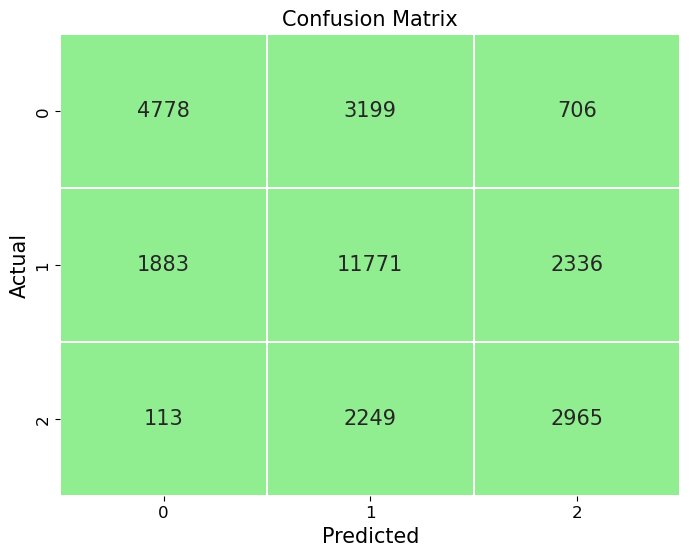

In [213]:
dt_cm = confusion_matrix(y_test, y_pred)

# Evaluating the model
print(f"Decision Tree Confusion Matrix:\n", dt_cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [214]:
dt_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
print(f"Decision Tree Model accuracy: {dt_accuracy}%")

Decision Tree Model accuracy: 65.05%


In [215]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the Decision Tree model to the function
dt_test_report = get_test_report(decision_tree, test_data = X_test)

# print the performace measures
print(dt_test_report)

              precision    recall  f1-score   support

           0       0.71      0.55      0.62      8683
           1       0.68      0.74      0.71     15990
           2       0.49      0.56      0.52      5327

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.66      0.65      0.65     30000



In [216]:
# compile the required information
dt_metrics = pd.Series({
                     'Model_Name': "Decision Tree",
                     'Model_Accuracy': dt_accuracy,
                     'Model_Precision': round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2),
                     'Model_Recall': round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)      
                       })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
results = results._append(dt_metrics, ignore_index=True)

# print the result table
results

,Model_Name,Model_Accuracy,Model_Precision,Model_Recall
0,Logistic Regression,61.86,61.31,61.86
1,K-Nearest Neighbors,66.28,65.56,66.28
2,Gaussian Naive Bayes',57.34,62.23,57.34
3,Decision Tree,65.05,65.62,65.05


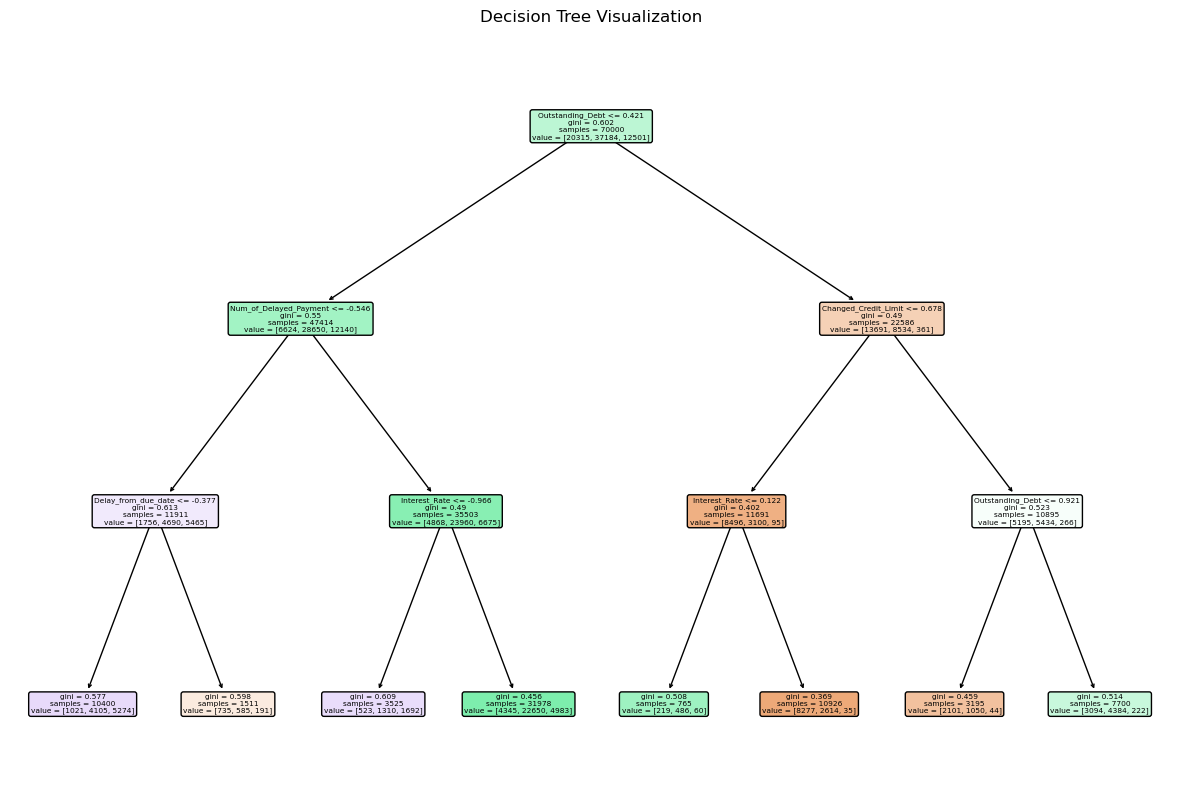

In [217]:
# Plotting the decision tree
features = X_train.columns.to_list()

plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names = features, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

## Random Forest Model

In [218]:
# Applying Random Forest Classification model (50 trees)

random_forest50 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 1)
random_forest50.fit(X_train, y_train)

# Predicting the Test set results
y_pred = random_forest50.predict(X_test)

Random Forest Model accuracy: 79.34%
Random Forest Confusion Matrix:
 [[ 7018  1595    70]
 [ 1808 13187   995]
 [   36  1695  3596]]


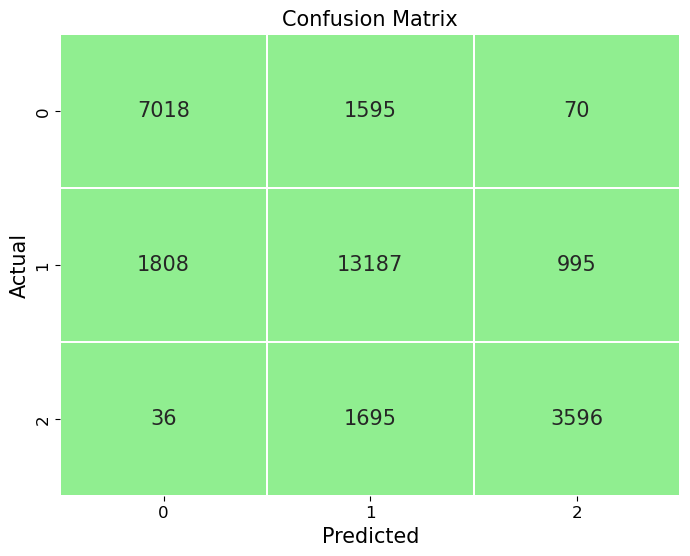

In [234]:
random_forest50_cm = confusion_matrix(y_test, y_pred)
random_forest50_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)

# Model Accuracy
print(f"Random Forest Model accuracy: {random_forest50_accuracy}%")

# Evaluating the model
print(f"Random Forest Confusion Matrix:\n", random_forest50_cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(random_forest50_cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [220]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the Random Forest model to the function
random_forest50_test_report = get_test_report(random_forest50, test_data = X_test)

# print the performace measures
print(random_forest50_test_report)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      8683
           1       0.80      0.82      0.81     15990
           2       0.77      0.68      0.72      5327

    accuracy                           0.79     30000
   macro avg       0.79      0.77      0.78     30000
weighted avg       0.79      0.79      0.79     30000



In [221]:
# compile the required information
random_forest50_metrics = pd.Series({
                     'Model_Name': "Random Forest (50 Trees)",
                     'Model_Accuracy': random_forest50_accuracy,
                     'Model_Precision': round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2),
                     'Model_Recall': round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)      
                       })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
results = results._append(random_forest50_metrics, ignore_index=True)

# print the result table
results

,Model_Name,Model_Accuracy,Model_Precision,Model_Recall
0,Logistic Regression,61.86,61.31,61.86
1,K-Nearest Neighbors,66.28,65.56,66.28
2,Gaussian Naive Bayes',57.34,62.23,57.34
3,Decision Tree,65.05,65.62,65.05
4,Random Forest (50 Trees),79.34,79.28,79.34


**From the above table, we can see that Random Forest with 50 Trees has the highest model accuracy of 79.34% among all the other models. It also has the highest precision and recall with 79.28% and 79.34% respectively.**

### Feature Selection

In [227]:
# Getting feature importances
importances = random_forest50.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame to store feature names and their corresponding importance scores
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Displaying feature importances
print("Feature Importances:\n")
feature_importances.head(10)

Feature Importances:



,Feature,Importance
12,Outstanding_Debt,0.097417
6,Interest_Rate,0.088674
14,Credit_History_Age,0.070003
8,Delay_from_due_date,0.060277
10,Changed_Credit_Limit,0.059863
11,Num_Credit_Inquiries,0.052471
9,Num_of_Delayed_Payment,0.047476
4,Num_Bank_Accounts,0.046044
3,Monthly_Inhand_Salary,0.043091
16,Amount_invested_monthly,0.042786


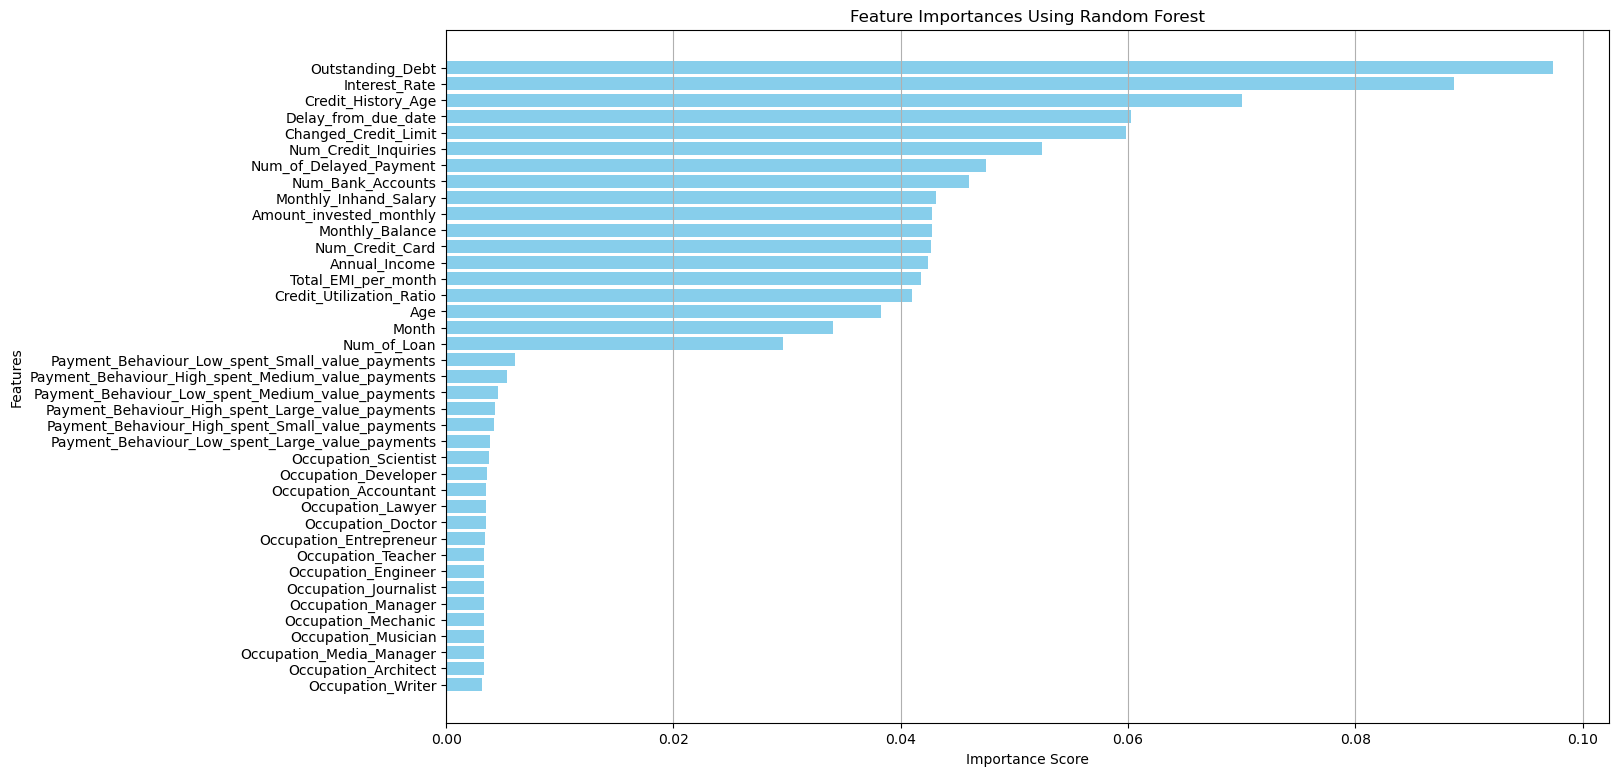

In [225]:
# Plotting the feature importances
plt.figure(figsize=(15, 9))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances Using Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.grid(axis='x')
plt.show()

In [230]:
# Choosing top 18 features

imp_feat = feature_importances.Feature.values[:18]
imp_feat

array(['Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age',
       'Delay_from_due_date', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Num_of_Delayed_Payment',
       'Num_Bank_Accounts', 'Monthly_Inhand_Salary',
       'Amount_invested_monthly', 'Monthly_Balance', 'Num_Credit_Card',
       'Annual_Income', 'Total_EMI_per_month', 'Credit_Utilization_Ratio',
       'Age', 'Month', 'Num_of_Loan'], dtype=object)

In [232]:
### Segretating X_train and X_test with these 18 important features

X_train_imp = X_train[imp_feat]
X_train_imp.shape

(70000, 18)

In [233]:
X_test_imp = X_test[imp_feat]
X_test_imp.shape

(30000, 18)

In [235]:
# Building Random forest model with these 18 important features

random_forest_imp = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 1)
random_forest_imp.fit(X_train_imp, y_train)

# Predicting the Test set results
y_pred_imp = random_forest_imp.predict(X_test_imp)

Random Forest Model (with Imp features) accuracy: 80.0%
Random Forest Model (with Imp features) Confusion Matrix:
 [[ 7097  1519    67]
 [ 1824 13147  1019]
 [   38  1532  3757]]


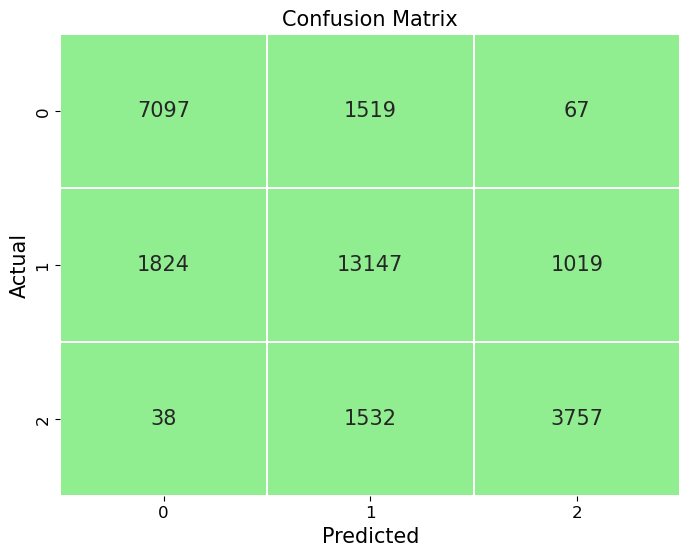

In [236]:
random_forest_imp_cm = confusion_matrix(y_test, y_pred_imp)
random_forest_imp_accuracy = round(100 * accuracy_score(y_test, y_pred_imp), 2)

# Model Accuracy
print(f"Random Forest Model (with Imp features) accuracy: {random_forest_imp_accuracy}%")

# Evaluating the model
print(f"Random Forest Model (with Imp features) Confusion Matrix:\n", random_forest_imp_cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(random_forest_imp_cm, annot=True, cmap = ListedColormap(['lightgreen']), fmt='g', cbar=False,
           linewidths = 0.1, annot_kws = {'size': 15})
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()

In [237]:
random_forest_imp_precision = round(100 * precision_score(y_test, y_pred_imp, average = 'weighted'), 2)
random_forest_imp_recall = round(100 * recall_score(y_test, y_pred_imp, average = 'weighted'), 2)

print('The precision of this model is {} %.'.format(random_forest_imp_precision))
print('The recall of this model is {} %.'.format(random_forest_imp_recall))

The precision of this model is 79.96 %.
The recall of this model is 80.0 %.


**We are getting the same (~80%) accuracy with 18 features as we were getting with 42 features.**

### Hyperparameter Tuning

In [238]:
# Base model is Random forest (with 18 important features)
tuned_params = {'n_estimators': [50,100,150],'max_depth': [50, 60]}

random_forest_imp_grid = GridSearchCV(estimator= random_forest_imp, param_grid= tuned_params, 
                           cv= 5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fitting the model
random_forest_imp_grid.fit(X_train_imp, y_train)

print("Best parameters found: ", random_forest_imp_grid.best_params_)
print("Best cross-validated score: ", random_forest_imp_grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'max_depth': 60, 'n_estimators': 150}
Best cross-validated score:  0.7901


### Cross Validation

In [241]:
from sklearn.model_selection import cross_val_score

In [242]:
# Defining the final Random Forest model with best parameters
best_params = {
    'n_estimators': 150,
    'max_depth': 60,
    'random_state': 1
    }

final_rf_model = RandomForestClassifier(**best_params)

# Performing cross-validation with 5 folds
cv_scores = cross_val_score(final_rf_model, X_train_imp, y_train, cv=5, scoring='accuracy')

# Printing cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy Score: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Accuracy Score: {cv_scores.std():.2f}")

# Train the final model on the full training data and evaluate it on the test set
final_rf_model.fit(X_train_imp, y_train)
y_pred = final_rf_model.predict(X_test_imp)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Cross-Validation Scores: [0.79157143 0.79271429 0.78928571 0.78957143 0.78971429]
Mean Accuracy Score: 0.79
Standard Deviation of Accuracy Score: 0.00
Test Set Accuracy: 0.80


In [244]:
# Using Test Data set for predicting the results

test_cleaned.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,2022.0,Good,809.98,35.030402,22.9,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,9.0,13.27,4.0,Good,809.98,33.053114,22.1,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN
100002,0x160c,CUS_0xd40,11,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,12.27,4.0,Good,809.98,33.811894,22.5,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,NaN
100003,0x160d,CUS_0xd40,12,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4.0,5.0,11.27,4.0,Good,809.98,32.430559,23.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,NaN
100004,0x1616,CUS_0x21b1,9,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3.0,1.0,5.42,5.0,Good,605.03,25.926822,27.3,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN


In [245]:
test_cleaned.shape

(50000, 28)

In [247]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 100000 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay

In [248]:
# creating 2 copies of cleaned test dataframe

df_test_cleaned = test_cleaned.copy()

In [249]:
# Performing log transformations on same numerical columns as done on train dataset
modified_age = [np.log(age) if age > 0 else 0 for age in df_test_cleaned['Age']]
df_test_cleaned['Age'] = modified_age

modified_sal = [np.log(sal) if sal > 0 else 0 for sal in df_test_cleaned['Monthly_Inhand_Salary']]
df_test_cleaned['Monthly_Inhand_Salary'] = modified_sal


modified_int_rate = [np.log(interest) if interest > 0 else 0 for interest in df_test_cleaned['Interest_Rate']]
df_test_cleaned['Interest_Rate'] = modified_int_rate


modified_pay = [np.log(pay) if pay > 0 else 0 for pay in df_test_cleaned['Num_of_Delayed_Payment']]
df_test_cleaned['Num_of_Delayed_Payment'] = modified_pay


modified_inquiry = [np.log(inquiry) if inquiry > 0 else 0 for inquiry in df_test_cleaned['Num_Credit_Inquiries']]
df_test_cleaned['Num_Credit_Inquiries'] = modified_inquiry


modified_emi = [np.log(emi) if emi > 0 else 0 for emi in df_test_cleaned['Total_EMI_per_month']]
df_test_cleaned['Total_EMI_per_month'] = modified_emi


modified_debt = [np.log(debt) if debt > 0 else 0 for debt in df_test_cleaned['Outstanding_Debt']]
df_test_cleaned['Outstanding_Debt'] = modified_debt


modified_amt = [np.log(amt) if amt > 0 else 0 for amt in df_test_cleaned['Amount_invested_monthly']]
df_test_cleaned['Amount_invested_monthly'] = modified_amt


modified_bal = [np.log(bal) if bal > 0 else 0 for bal in df_test_cleaned['Monthly_Balance']]
df_test_cleaned['Monthly_Balance'] = modified_bal

In [250]:
# Dropping unnecessary columns

df_test_cleaned.drop(columns = ['Name', 'SSN','Type_of_Loan'], inplace = True)

In [251]:
df_test_cleaned.shape

(50000, 25)

In [252]:
test_cat_df = df_test_cleaned.select_dtypes(include = 'object').drop(columns = ['ID','Customer_ID','Credit_Mix','Payment_of_Min_Amount'])

# List of columns to one-hot encode
test_cat_cols = ['Occupation','Payment_Behaviour']

# One-hot encode the categorical columns
test_df_encoded = pd.get_dummies(test_cat_df, columns= test_cat_cols, dtype = 'int')

test_df_encoded.head()

,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
100000,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
100001,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
100002,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
100003,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
100004,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [254]:
# Concatenate the encoded columns with the original dataframe
# Dropping the original categorical columns before concatenation

test_cred = pd.concat([df_test_cleaned.drop(['Credit_Mix','Payment_of_Min_Amount','Occupation',
                                    'Payment_Behaviour','Credit_Score'], axis=1), test_df_encoded],axis=1)
test_cred.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
100000,0x160a,CUS_0xd40,9,3.135494,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.945910,11.27,7.611842,6.697010,35.030402,22.9,3.903486,5.466551,5.227180,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
100001,0x160b,CUS_0xd40,10,3.178054,19114.12,7.509249,3,4,1.098612,4.0,3.0,2.197225,13.27,1.386294,6.697010,33.053114,22.1,3.903486,3.066441,5.890107,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
100002,0x160c,CUS_0xd40,11,3.178054,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.386294,12.27,1.386294,6.697010,33.811894,22.5,3.903486,4.998792,5.578504,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
100003,0x160d,CUS_0xd40,12,3.135494,19114.12,7.509249,3,4,1.098612,4.0,4.0,1.609438,11.27,1.386294,6.697010,32.430559,23.0,3.903486,3.665675,5.840138,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
100004,0x1616,CUS_0x21b1,9,3.332205,34847.84,8.018950,2,4,1.791759,1.0,3.0,0.000000,5.42,1.609438,6.405278,25.926822,27.3,2.934719,3.680949,6.184764,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [255]:
test_cred.shape

(50000, 42)

In [256]:
test_df_log_transformed = test_cred.iloc[ : , 2:20]
test_df_log_transformed.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
100000,9,3.135494,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.945910,11.27,7.611842,6.697010,35.030402,22.9,3.903486,5.466551,5.227180
100001,10,3.178054,19114.12,7.509249,3,4,1.098612,4.0,3.0,2.197225,13.27,1.386294,6.697010,33.053114,22.1,3.903486,3.066441,5.890107
100002,11,3.178054,19114.12,7.509249,3,4,1.098612,4.0,3.0,1.386294,12.27,1.386294,6.697010,33.811894,22.5,3.903486,4.998792,5.578504
100003,12,3.135494,19114.12,7.509249,3,4,1.098612,4.0,4.0,1.609438,11.27,1.386294,6.697010,32.430559,23.0,3.903486,3.665675,5.840138
100004,9,3.332205,34847.84,8.018950,2,4,1.791759,1.0,3.0,0.000000,5.42,1.609438,6.405278,25.926822,27.3,2.934719,3.680949,6.184764


In [257]:
test_id_df = test_cred.iloc[:,0:2]
test_id_df.head()

,ID,Customer_ID
100000,0x160a,CUS_0xd40
100001,0x160b,CUS_0xd40
100002,0x160c,CUS_0xd40
100003,0x160d,CUS_0xd40
100004,0x1616,CUS_0x21b1


In [258]:
# -------- Numerical features scaling ------------ #

# instantiate the 'StandardScaler'
test_scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
test_num_features_scaled = test_scaler.fit_transform(test_df_log_transformed)

# convert the array back to a dataframe
# pass the required column names to the parameter 'columns'
test_scaled_num_df = pd.DataFrame(test_num_features_scaled, columns = test_df_log_transformed.columns)

# Concatenate the scaled numerical features with the original DataFrame containing categorical features
test_final_df = pd.concat([test_id_df.reset_index(drop=True), test_scaled_num_df, test_df_encoded.reset_index(drop=True)], axis=1)

# summarize the dataframe
# use 'round()' to consider the integer values
round(test_final_df.describe())

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0
mean,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.0,-2.0,-0.0,-3.0,-0.0,-0.0,-2.0,-0.0,-1.0,-3.0,-2.0,-2.0,-8.0,-2.0,-2.0,-2.0,-5.0,-15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-1.0,-1.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,1.0,3.0,19.0,2.0,15.0,11.0,6.0,24.0,3.0,7.0,4.0,6.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [259]:
test_final_df.shape

(50000, 42)

In [260]:
x_test = test_final_df.copy()

In [261]:
# Selecting the 18 important features only while predicting the results on our base model : Random Forest

x_test_imp = x_test[imp_feat]
x_test_imp.shape

(50000, 18)

In [262]:
# Model predictions

predictions = random_forest_imp.predict(x_test_imp)

results_df = pd.DataFrame({'ID': test_final_df['ID'],
                            'Predicted_Values': predictions
                            })

prediction_table = results_df.reset_index().drop(columns=['index'])
prediction_table

,ID,Predicted_Values
0,0x160a,2
1,0x160b,2
2,0x160c,2
3,0x160d,2
4,0x1616,2
...,...,...
49995,0x25fe5,1
49996,0x25fee,0
49997,0x25fef,1
49998,0x25ff0,0


In [263]:
prediction_table['Predicted_Values'].value_counts()

Predicted_Values
1    27715
0    14370
2     7915
Name: count, dtype: int64

### Business Insights and Recommendations

* Majority of customers (~55%) have "Standard" credit scores, indicating a strong opportunity for targeted services 
  to help them improve to the "Good" credit level.

* A substantial proportion of customers (~29%) fall under the "Poor" Credit Segment, requiring focused financial
  counseling, loan restructuring, or educational content to enhance their financial stability and reduce default risks.

* Only ~16% customers have "Good" credit scores, suggesting an opportunity to encourage credit-building practices. These
  customers could benefit from loyalty programs or premium financial services.
  
Here are a few recommendations :-

**Credit Risk and Loan Structuring:** "Poor" credit segment poses increased risk, highlighting the need for stricter
  monitoring, conservative credit limits, or adjusted loan terms to minimize potential financial losses.

**Cross-Selling and Marketing:** Customers with "Standard" or "Good" credit scores could be targeted for upselling
  financial products like personal loans or credit cards to leverage potential revenue opportunities.

**Customized Customer Programs:** Focused programs for each category (financial counseling for "Poor," credit improvement
  for "Standard," and loyalty benefits for "Good") will enhance customer satisfaction and retention.

In [264]:
# Exporting the predicted values table into CSV file

prediction_table.to_csv('Supervised_Predictions_by_Avisha.csv', index=True)